## Business Case: Walmart - Confidence Interval and CLT

### About Walmart
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

### Business Problem
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Dataset
The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: Walmart_data.csv

**User_ID:**	User ID<br>
**Product_ID:**	Product ID<br>
**Gender:**	Sex of User<br>
**Age:**	Age in bins<br>
**Occupation:**	Occupation(Masked)<br>
**City_Category:**	Category of the City (A,B,C)<br>
**StayInCurrentCityYears:**	Number of years stay in current city<br>
**Marital_Status:**	Marital Status<br>
**ProductCategory:**	Product Category (Masked)<br>
**Purchase:**	Purchase Amount<br>

## 1. Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

In [ ]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [ ]:
df.shape
print(f"Transactions(Rows): {df.shape[0]}, Features(Columns): {df.shape[1]}")

Transactions(Rows): 550068, Features(Columns): 10


In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

Insights
- User ID will be considered as categorical variable because it is just an identifier
- Likewise Occupation, Product_Category are masked and hence can be considered as categories
- Marital_Status will be a boolean and hence can be considered as categorical variable

In [ ]:
# Based on the insights, converting the numerical columns to the appropriate data type
df['User_ID'] = df['User_ID'].astype('object')
df["Occupation"] = df["Occupation"].astype("object")
df["Marital_Status"] = df["Marital_Status"].astype("object")
df["Product_Category"] = df["Product_Category"].astype("object")

# converting all the object type into category type
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

df.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object

Insights
- Except Purchase Feature (Amount Purchased) which is a numerical variable, all other things are categorical features
- Converted all the object type variables into categorical type for easier processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Insights
- There is no Missing Values which indicates that there is no need for filling up data

In [ ]:
duplicated_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicated_rows}")


Number of duplicate rows: 0


Insights
- There is not duplicate rows in the given dataset

In [ ]:
# value counts of each column
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: User_ID
User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002111       7
1005391       7
1002690       7
1005608       7
1000708       6
Name: count, Length: 5891, dtype: int64


Column: Product_ID
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1
Name: count, Length: 3631, dtype: int64


Column: Gender
Gender
M    414259
F    135809
Name: count, dtype: int64


Column: Age
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64


Column: Occupation
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622


In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
df.describe()

Purchase
count  550068.000000
mean     9263.968713
std      5023.065394
min        12.000000
25%      5823.000000
50%      8047.000000
75%     12054.000000
max     23961.000000

Insights
- Since Purchase is the only numerical category, we got statistical data for that alone.
- Based on the results, we can identify that median is not same as mean which indicates that there is a skewness
- And Mean is higher than Median indicates that it's right skewed distribution.
- We can also infer that there is a huge difference between the min and max which may indicate that there might be a outliers

In [ ]:
# describe non-numeric columns
df.describe(include='category')

User_ID Product_ID  Gender     Age  Occupation City_Category  \
count    550068     550068  550068  550068      550068        550068   
unique     5891       3631       2       7          21             3   
top     1001680  P00265242       M   26-35           4             B   
freq       1026       1880  414259  219587       72308        231173   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  
count                      550068          550068            550068  
unique                          5               2                20  
top                             1               0                 5  
freq                       193821          324731            150933

Insights
- **User_ID:** There are 5891 unique users who purchased for 5,50,086 (apprx. 5.5L transactions) times. One such user had a transaction history of 1026 times.
- **Product_ID:** There are 3631 unique products in which one product called P00265242 had a high sales of around 1880 times.
- **Gender:** There are two genders available in the dataset in which male users are dominating in the purchase
- **Age:** Customers who are purchasing are fallen into 7 distinct age groups in which 26-35 made the more purchase
- **Occupation:** There are 21 unique occupations identified in dataset (which are masked). In that, Occupation identifier 4 had a more purchases
- **City_Category:** Customers who are purchasing are only from three different cities in which B had more purchases
- **Stay_In_Current_City_Years:** People who are staying in the current city where they purchases was categorized into 5 categories in which most of purchases are done by people who recently relocated (1 year).
- **Marital_Status:** This was also a Boolean field with either true or false. Surprisingly, non-married people purchased a lot
- **Product_Category:** As we seen above, all the 3631 products are categorized into 20 unique groups. In that, 5th Category is having more purchases.

In [ ]:
for col in df.columns:
    print(col, np.sort(df[col].unique()))

User_ID [1000001 1000002 1000003 ... 1006038 1006039 1006040]
Product_ID ['P00000142' 'P00000242' 'P00000342' ... 'P0099742' 'P0099842' 'P0099942']
Gender ['F' 'M']
Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
Occupation [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
City_Category ['A' 'B' 'C']
Stay_In_Current_City_Years ['0' '1' '2' '3' '4+']
Marital_Status [0 1]
Product_Category [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Purchase [   12    13    14 ... 23959 23960 23961]


Insights:
- Except User_ID and Product_ID from categories, every other features are having less categories and can be easily visualized.
- For Gender, Male and Female alone is the categories. Likewise, Married or not is for Marital_Status
- For City_Category, it's A, B and C. Likewise, 0, 1, 2, 3 and 4+ are the categories for Stay_In_Current_City_Years
- For Ages, there are 7 groups starting from 0 till 55+
- There are 20 product categories from 1 till 20

## 2. Preprocessing of Data

In [ ]:
# Converting the 0 and 1 of Marital_Status to 'Unmarried' and 'Married'
df['Marital_Status'] = df['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'})
df.sample(5)

User_ID Product_ID Gender    Age Occupation City_Category  \
85005   1001135  P00363742      M  51-55         13             C   
9942    1001514  P00295742      M  18-25          4             B   
61351   1003474  P00101342      M  36-45         11             C   
525055  1002917  P00153742      M  26-35          0             A   
160014  1000755  P00255842      F  36-45          0             B   

       Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
85005                           1        Married                5      6963  
9942                           4+        Married                8      7918  
61351                          4+        Married                6     16506  
525055                          2        Married                8      8011  
160014                          3        Married               16     20591

Before Analysing Features, will find the Ouliers and will treat them

In [ ]:
def box_plot_outlier_analysis(df, col):
    # Box Plot for col to check for outliers
    plt.figure(figsize=(15, 5))
    sns.set(style="whitegrid")
    sns.set_palette("Set2")
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

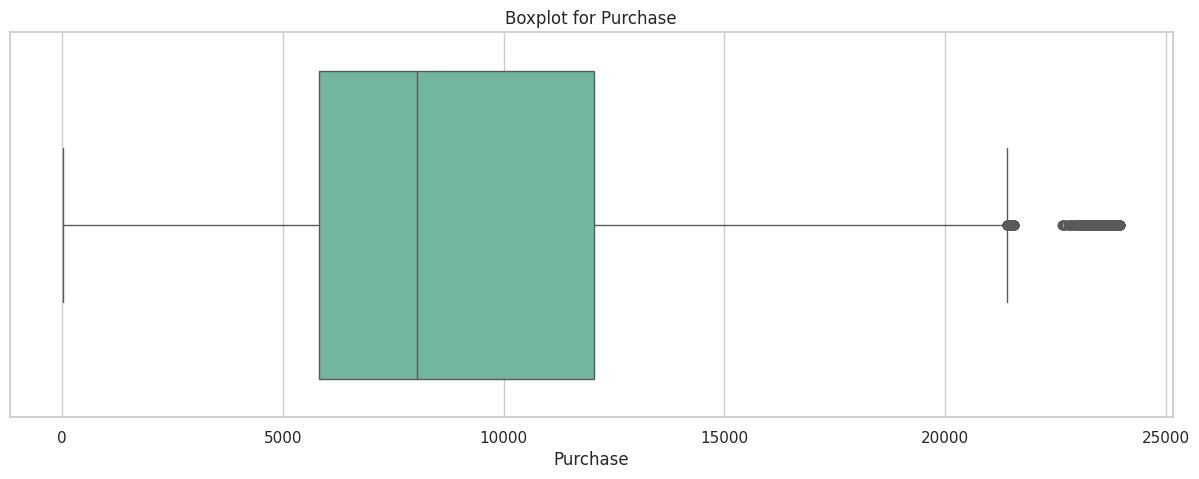

In [ ]:
box_plot_outlier_analysis(df, 'Purchase')

In [ ]:
def outlier_analysis(df):
    # Finding the Interquartile Range
    Q1 = df['Purchase'].quantile(0.25)
    Q3 = df['Purchase'].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Interquartile Range: {IQR}")
    # Outliers
    outliers = df[(df['Purchase'] < (Q1 - 1.5 * IQR)) | (df['Purchase'] > (Q3 + 1.5 * IQR))]
    print(f"Number of outliers: {outliers.shape[0]}")
    print(f"Percentage of outliers: {outliers.shape[0] / df.shape[0] * 100:.2f}%")
    return (Q1, Q3, IQR)

In [ ]:
Q1, Q3, IQR = outlier_analysis(df)

Interquartile Range: 6231.0
Number of outliers: 2677
Percentage of outliers: 0.49%


In [ ]:
male_outliers = outlier_analysis(df.loc[df["Gender"] == "M"])

Interquartile Range: 6591.0
Number of outliers: 1812
Percentage of outliers: 0.44%


In [ ]:
female_outliers = outlier_analysis(df.loc[df["Gender"] == "F"])

Interquartile Range: 5967.0
Number of outliers: 2065
Percentage of outliers: 1.52%


In [ ]:
married_outliers = outlier_analysis(df.loc[df["Marital_Status"] == "Married"])

Interquartile Range: 6199.0
Number of outliers: 1233
Percentage of outliers: 0.55%


In [ ]:
unmarried_outliers = outlier_analysis(df.loc[df["Marital_Status"] == "Unmarried"])

Interquartile Range: 6456.0
Number of outliers: 1303
Percentage of outliers: 0.40%


Insights:
- We can see that there are outliers in the Purchase Amount which is evident from the boxplot
- Outliers were around 0.5% of the data which is very less and hence we can remove them instead of going for imputation
- Additionally checked the outlier percentages for Gender and Marital Status. It's very less and resembles the same as the overall data

In [ ]:
# Removing the outliers
df = df[~((df['Purchase'] < (Q1 - 1.5 * IQR)) | (df['Purchase'] > (Q3 + 1.5 * IQR)))]
df.shape

(547391, 10)

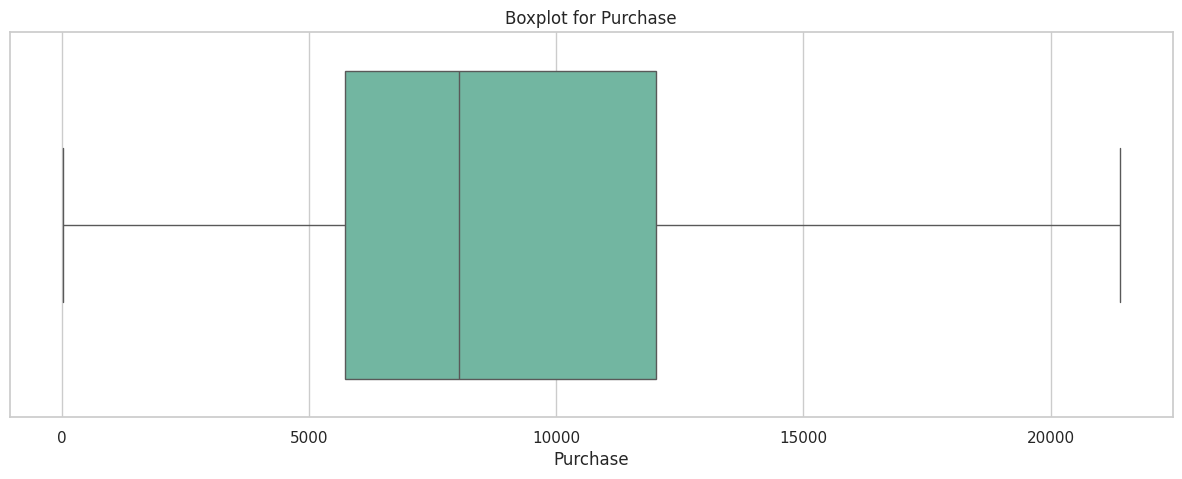

In [ ]:
box_plot_outlier_analysis(df, 'Purchase')

## 3. Basic Graphical Analysis

### Univariate Analysis

In [ ]:
def pie_chart_analysis(data, column, title, ax):
    data[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, ax=ax, colors=["#D35400", "#2980B9",'#27AE60'])
    ax.set_title(title)
    ax.set_ylabel('')

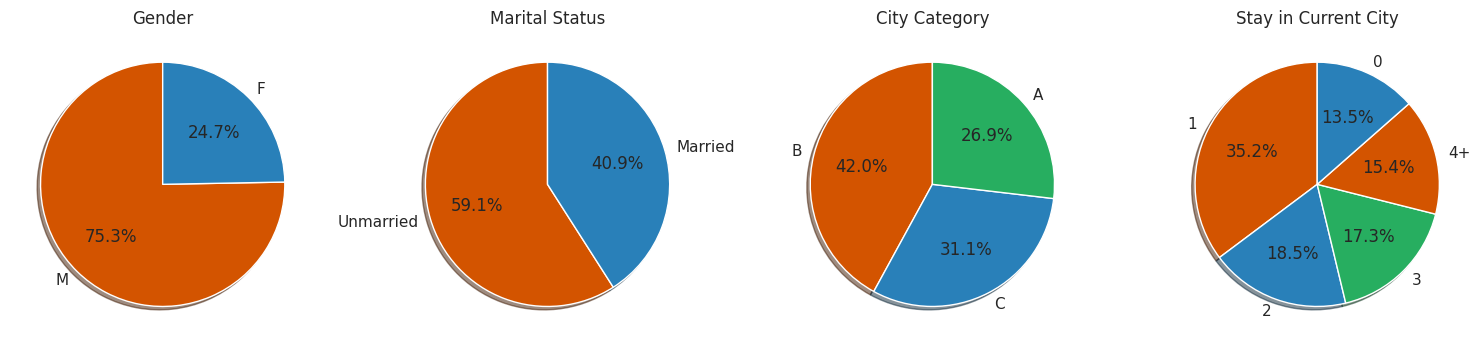

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 6))
# Plot Gender pie chart
pie_chart_analysis(df, "Gender", "Gender", axes[0])

# Plot Marital_Status pie chart
pie_chart_analysis(df, "Marital_Status", "Marital Status", axes[1])

# Plot City Category pie chart
pie_chart_analysis(df, "City_Category", "City Category", axes[2])

# Plot Stay_In_Current_City_Years pie chart
pie_chart_analysis(df, "Stay_In_Current_City_Years", "Stay in Current City", axes[3])

plt.tight_layout()
plt.show()

Insights:
- Based on the visualizations, there are 75.3% of Purchases are done by Male customers and 24.7% of the purchases are done by Female customers
- Based on the visualizations, there are 59% of Purchases are done by Non-Married customers and 41% of the purchases are done by Married customers
- Based on the visualizations, there are 42% of Purchases done in B City, 26.9% in A City and 31.1% in C City
- Based on the visualizations, there are 35.2% of Purchases done by people who are staying in the current city for 1 year, 18.5% for 2 years, 17.3% for 3 years, 15.4% for 4+ years and 13.5% for 0 years

In [ ]:
def count_plot_analysis(df, col):
    plt.figure(figsize=(15, 5))
    sns.set(style="whitegrid")
    sns.set_palette("Set2")
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title('Count Plot for Age')
    plt.ylabel('Count')
    plt.xlabel(col)
    total = len(df[col])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 3, f'{height / total * 100:.2f}%', ha='center')
    plt.show()


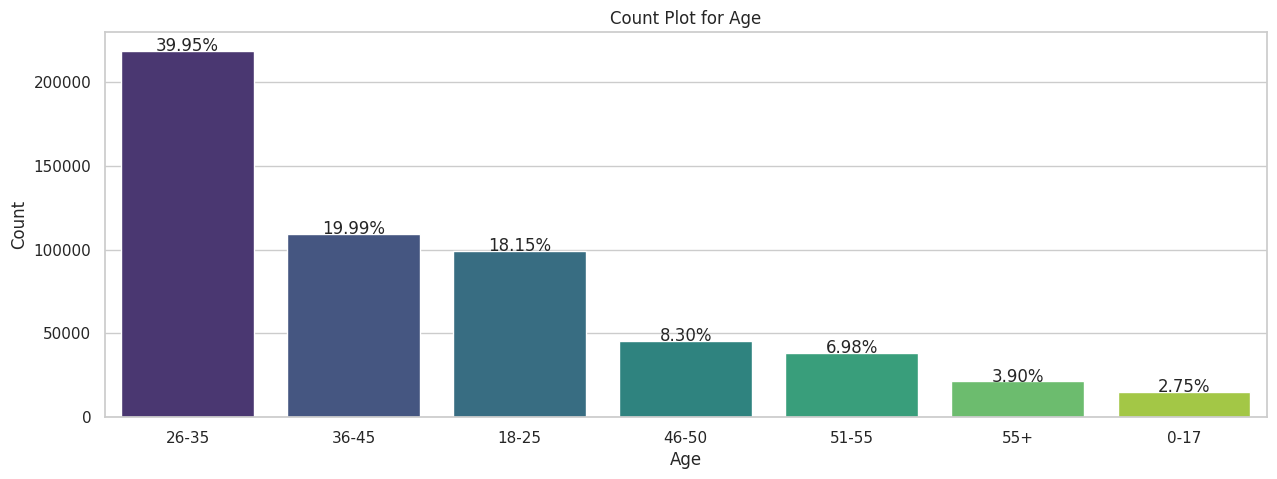

In [ ]:
# Age Group Analysis
count_plot_analysis(df, 'Age')

Insights:
- The visualizations indicate that 39.95% of purchases are made by individuals aged 26-35.
- The visualizations indicate that 19.99% of purchases are made by individuals aged 36-45.
- The visualizations indicate that 18.15% of purchases are made by individuals aged 18-25.
- The visualizations indicate that 8.3% of purchases are made by individuals aged 46-50.
- The visualizations indicate that 6.98% of purchases are made by individuals aged 51-55.
- The visualizations indicate that 3.90% of purchases are made by individuals aged 55 and above.
- The visualizations indicate that 2.75% of purchases are made by individuals aged 0-17.


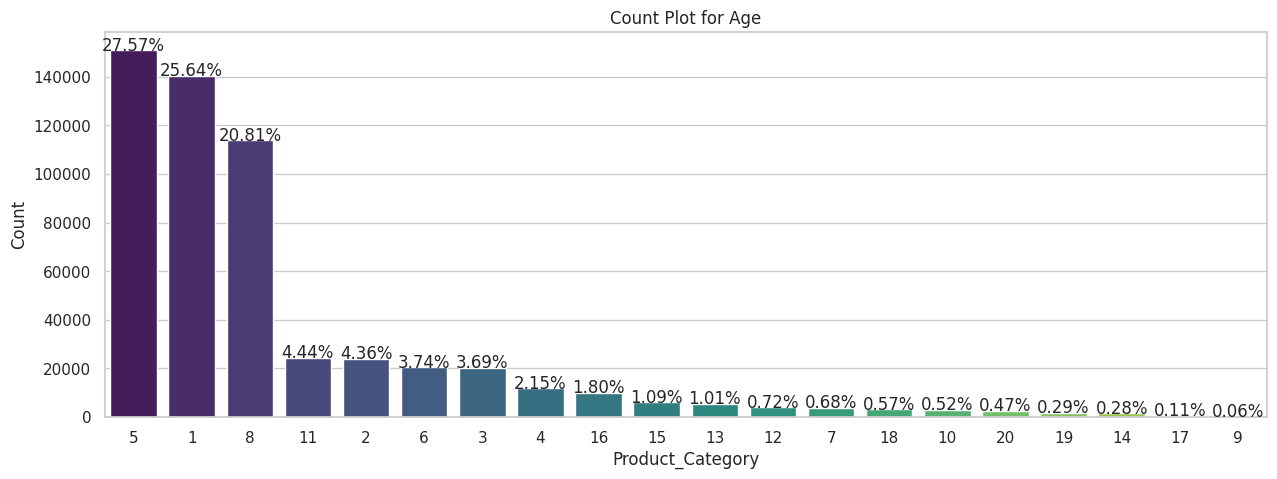

In [ ]:
count_plot_analysis(df, 'Product_Category')

Insights:
- Based on the visuals, we can infer the Pareto Principle which states that 80% of the effects come from 20% of the causes. In this case, 78% of the purchases are made by 20% of the products. This is a good insight for the business to focus on the top 20% of the products.


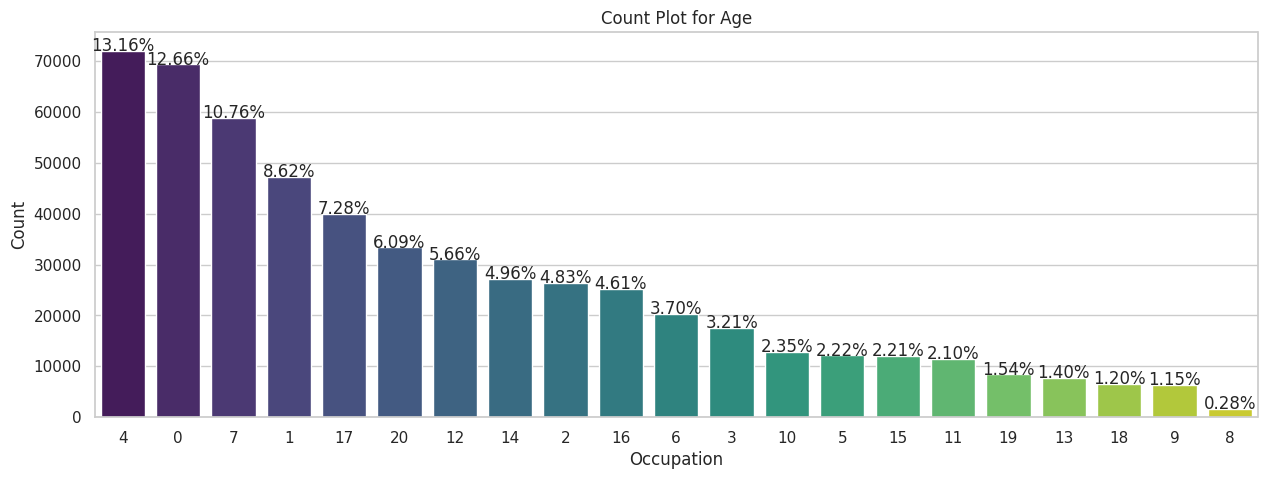

In [ ]:
count_plot_analysis(df, 'Occupation')

Insights:
- Visuals indicates that 13.15% of purchases are made by individuals who are in Occupation 4
- Likewise, 12.66% of purchases are made by individuals who are in Occupation 0
- 10.75% of purchases are made by individuals who are in Occupation 7
- 8.62% of purchases are made by individuals who are in Occupation 1
- Same for other occupations as well

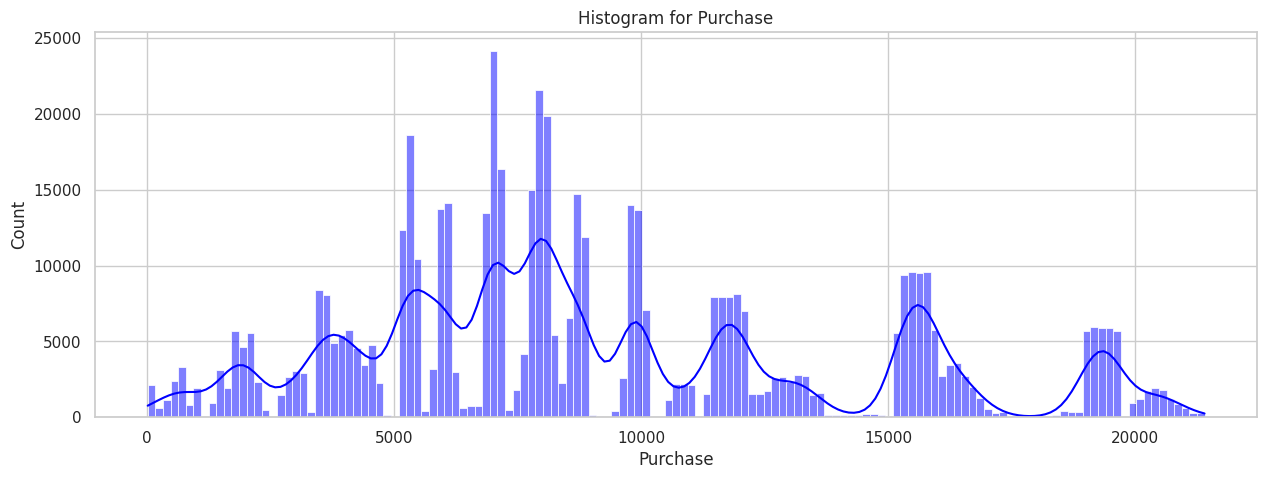

In [ ]:
# histogram for Purchase
plt.figure(figsize=(15, 5))
sns.set(style="whitegrid")
sns.set_palette("Set2")
sns.histplot(df['Purchase'], kde=True, color='blue')
plt.title('Histogram for Purchase')
plt.show()

Insights:
- From the graph, we can infer that the Purchase Amount is not normally distributed and it's right skewed
- Hence, we can go for log transformation to make it normally distributed
- We can use Central Limit Theorem to make the data normally distributed which will help us in making better decisions

### Bi-Variate Analysis

#### Numerical Vs Categorical Analysis

Our Target Variable is Purchase Amount and we will analyze the relationship between Purchase Amount and other features

In [ ]:
# bivariate analysis
def box_plot_analysis(df, col1, ax):
    sns.set(style="whitegrid")
    sns.set_palette("Set2")
    sns.boxplot(x=col1, y='Purchase', data=df, ax=ax)
    ax.set_title(f'Purchase vs {col1}')



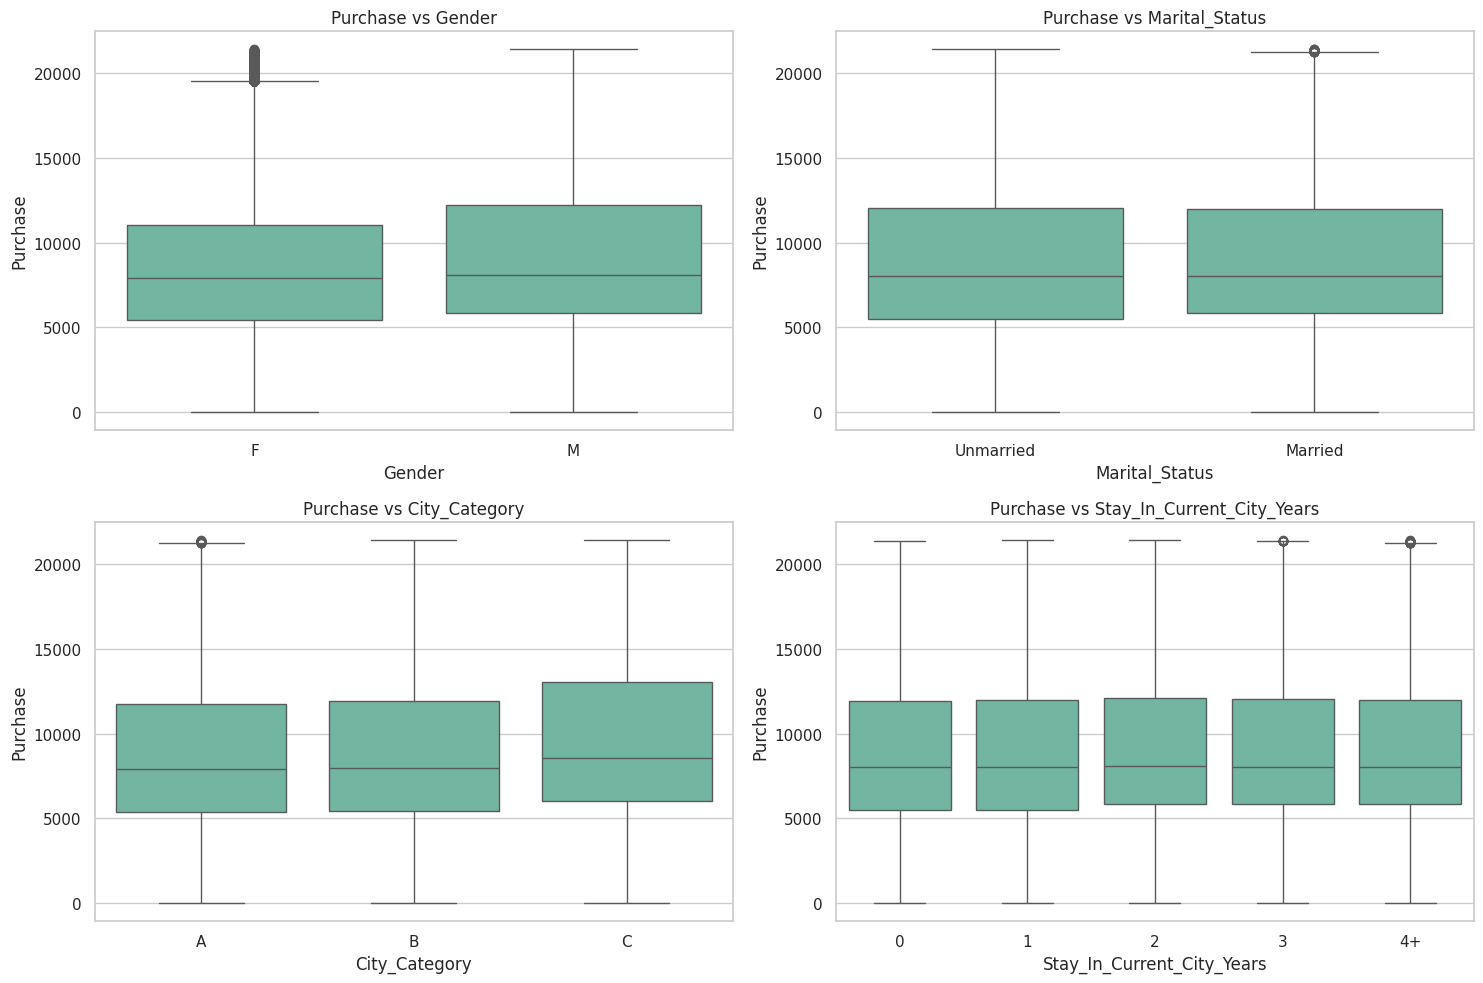

In [ ]:
# Create subplots for suitable features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot Gender vs Purchase
box_plot_analysis(df, 'Gender', axes[0, 0])

# Plot Marital_Status vs Purchase
box_plot_analysis(df, 'Marital_Status', axes[0, 1])

# Plot City_Category vs Purchase
box_plot_analysis(df, 'City_Category', axes[1, 0])

# Plot Stay_In_Current_City_Years vs Purchase
box_plot_analysis(df, 'Stay_In_Current_City_Years', axes[1, 1])

plt.tight_layout()
plt.show()

Insights:
- Based on the visuals, we can infer that there is no much difference in the Purchase Amount with respect to gender, marital status, city category, stay in current city years

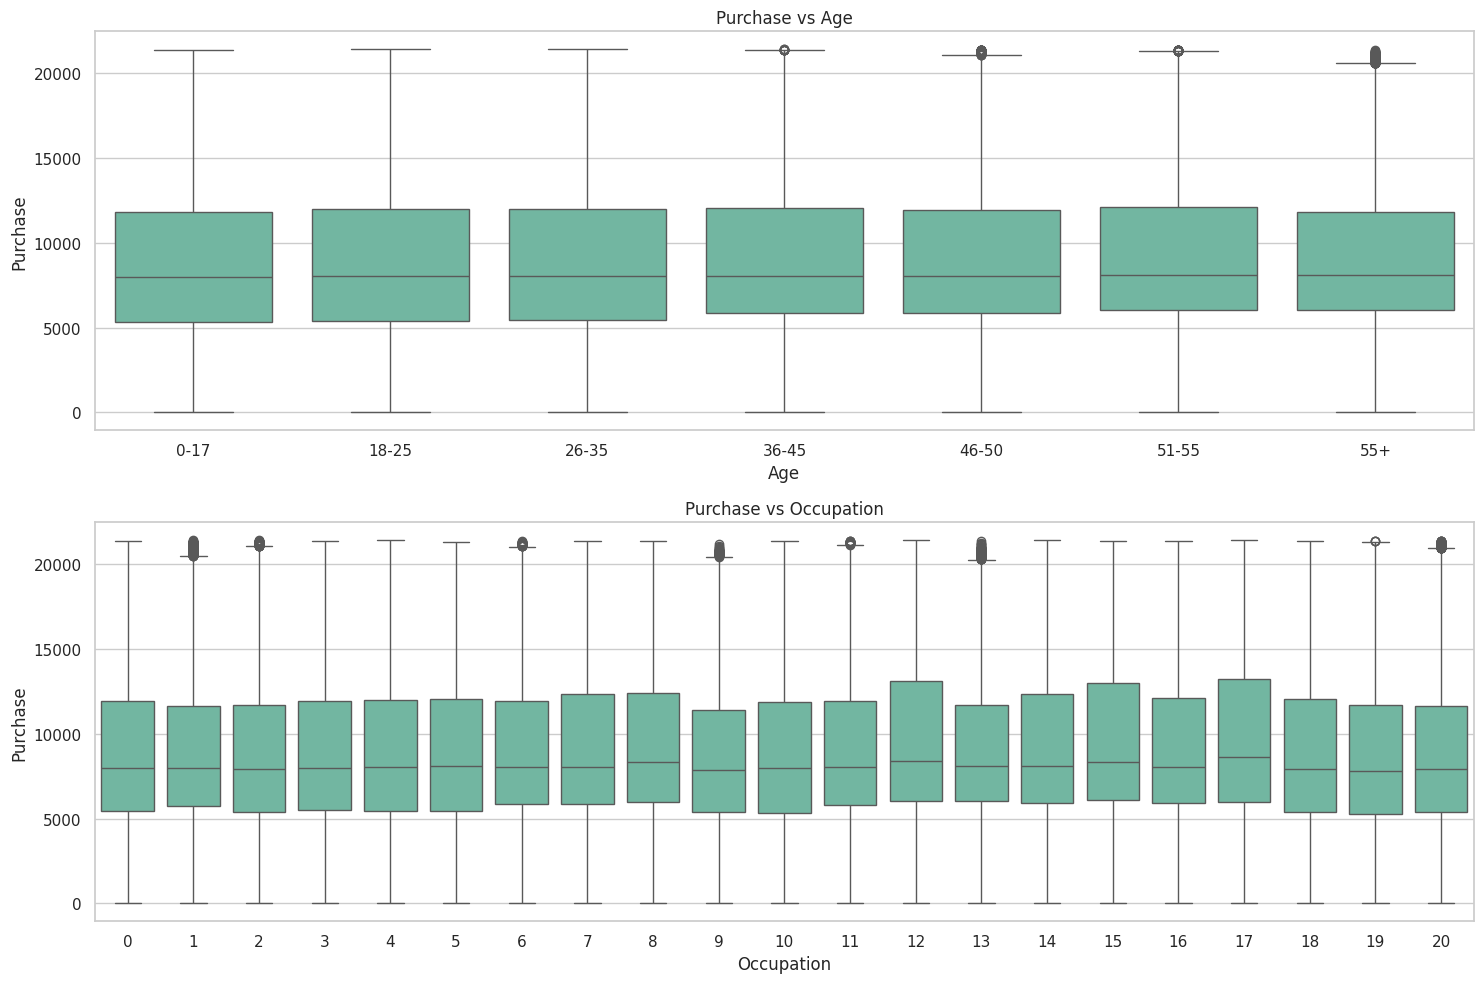

In [ ]:
# Create subplots for suitable features
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot Age vs Purchase
box_plot_analysis(df, 'Age', axes[0])

# Plot Occupation vs Purchase
box_plot_analysis(df, 'Occupation', axes[1])

plt.tight_layout()
plt.show()


Insights:
- Based on the visuals, we can infer that there is no much difference in the Purchase Amount with respect to age groups and product categories.
- Eventhough there is a slight difference in Occupation, it's not significant.

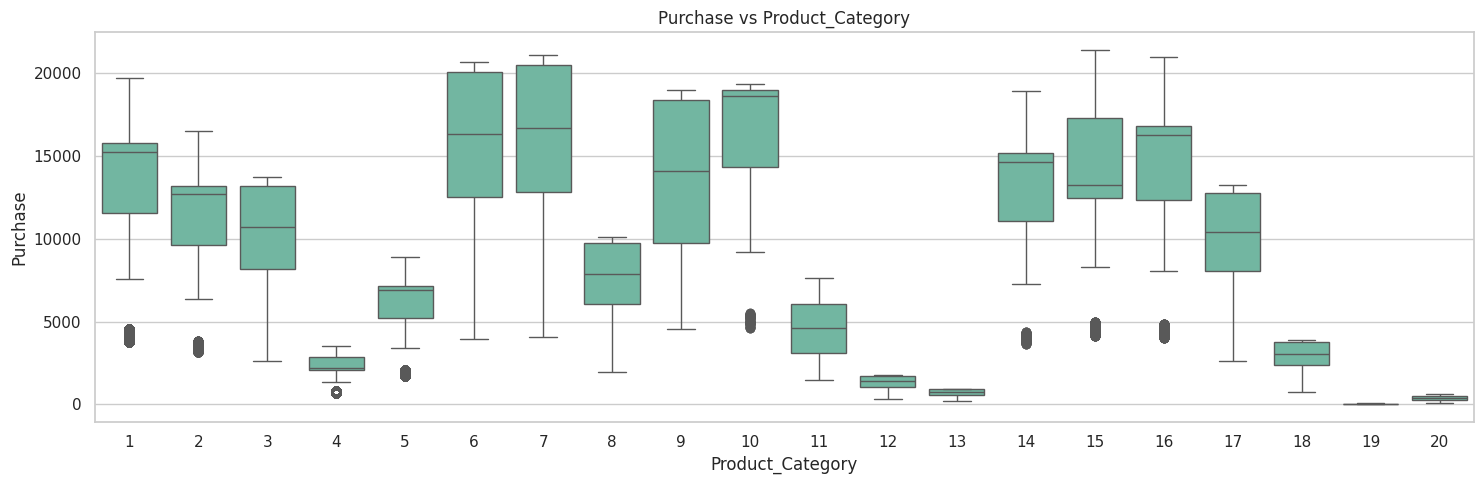

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

box_plot_analysis(df, 'Product_Category', axes)

plt.tight_layout()
plt.show()

Insights:
- Based on the visuals, we can't infer much. Hence, ignoring for analysis

**Ignoring Pairplot and Heatmap as it's not giving much insights for the given dataset where only one numerical feature is available**

#### Categorical vs Categorical Analysis

In [ ]:
def cout_plot_analysis(df, col1, col2, ax):
    sns.set(style="whitegrid")
    sns.set_palette("Set2")
    sns.countplot(x=col1, hue=col2, data=df, palette='viridis', ax=ax)
    ax.set_title(f'{col1} vs {col2}')
    ax.set_ylabel('Count')
    ax.set_xlabel(col1)

In [ ]:
def count_plot_analysis(df, col1, col2, ax):
    sns.set(style="whitegrid")
    sns.set_palette("Set2")
    sns.countplot(x=col1, hue=col2, data=df, ax=ax, palette='viridis')
    ax.set_title(f'{col1} vs {col2}')



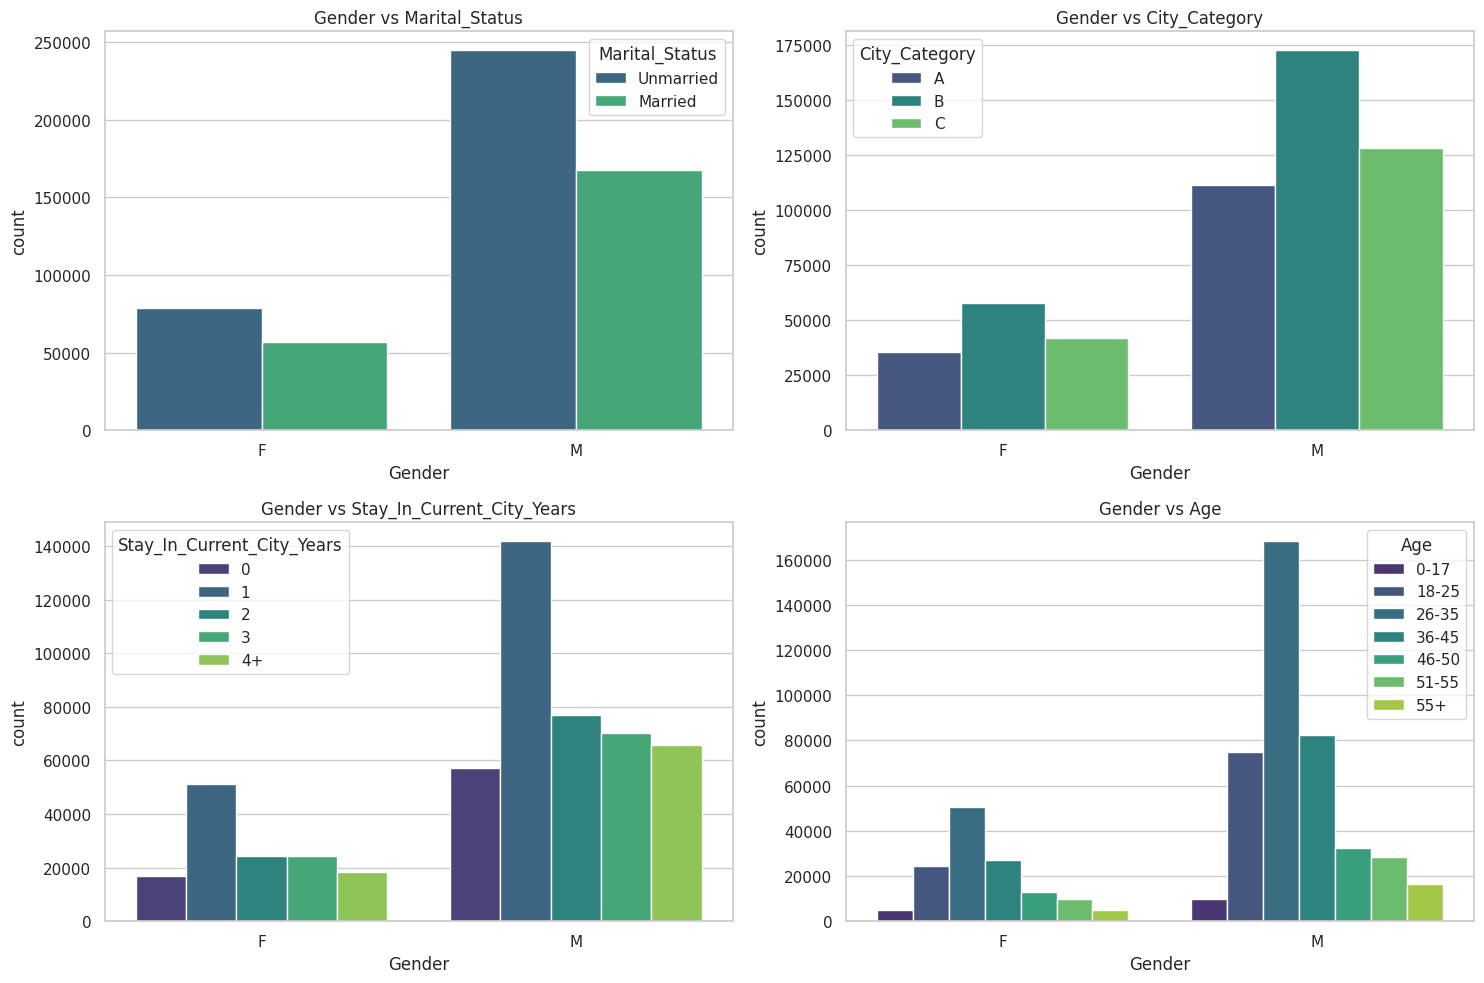

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender vs Marital_Status
count_plot_analysis(df, "Gender", "Marital_Status", axes[0, 0])

# Gender vs City_Category
count_plot_analysis(df, "Gender", "City_Category", axes[0, 1])

# Gender vs Stay_In_Current_City_Years
count_plot_analysis(df, "Gender", "Stay_In_Current_City_Years", axes[1, 0])

# Gender vs Age
count_plot_analysis(df, "Gender", "Age", axes[1, 1])

plt.tight_layout()
plt.show()


Insights:
- From the graph, we can infer that there is a clear dominance of purchase done by Male customers over Female Customers with respect to City Category, Marital Status and Age Group.

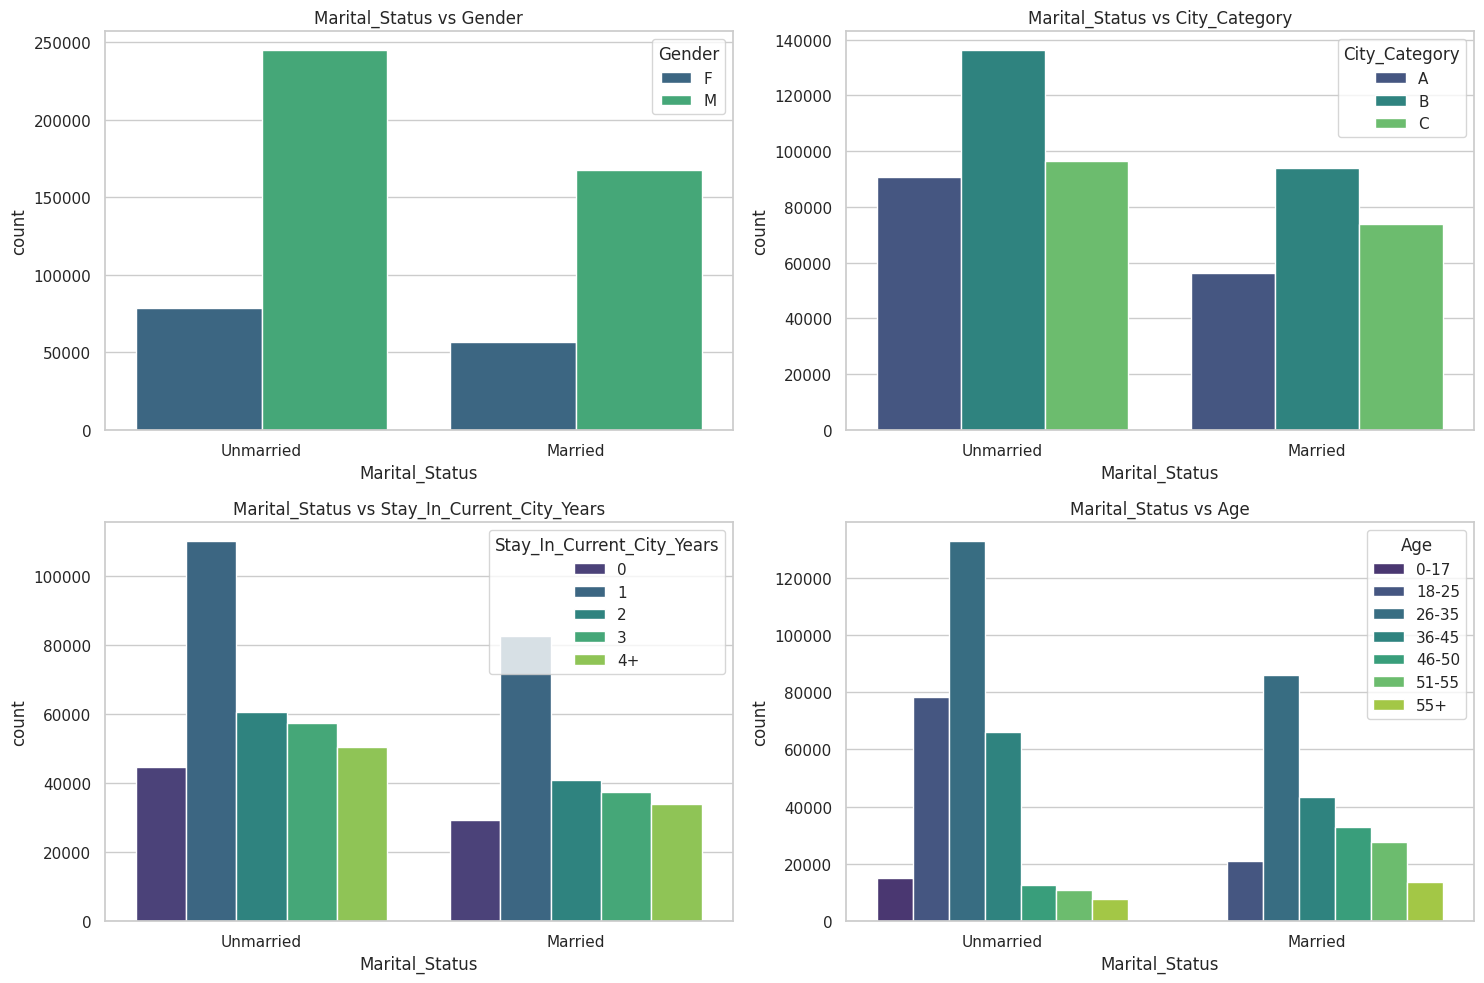

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender vs Marital_Status
count_plot_analysis(df, "Marital_Status", "Gender", axes[0, 0])

# Gender vs City_Category
count_plot_analysis(df, "Marital_Status", "City_Category", axes[0, 1])

# Gender vs Stay_In_Current_City_Years
count_plot_analysis(df, "Marital_Status", "Stay_In_Current_City_Years", axes[1, 0])

# Gender vs Age
count_plot_analysis(df, "Marital_Status", "Age", axes[1, 1])

plt.tight_layout()
plt.show()


Insights:
- From the graph, we can infer that there is a clear dominance of purchase done by Unmarried customers over Married Customers with respect to City Category, Gender, Stay in Current City (in years) and Age Group.

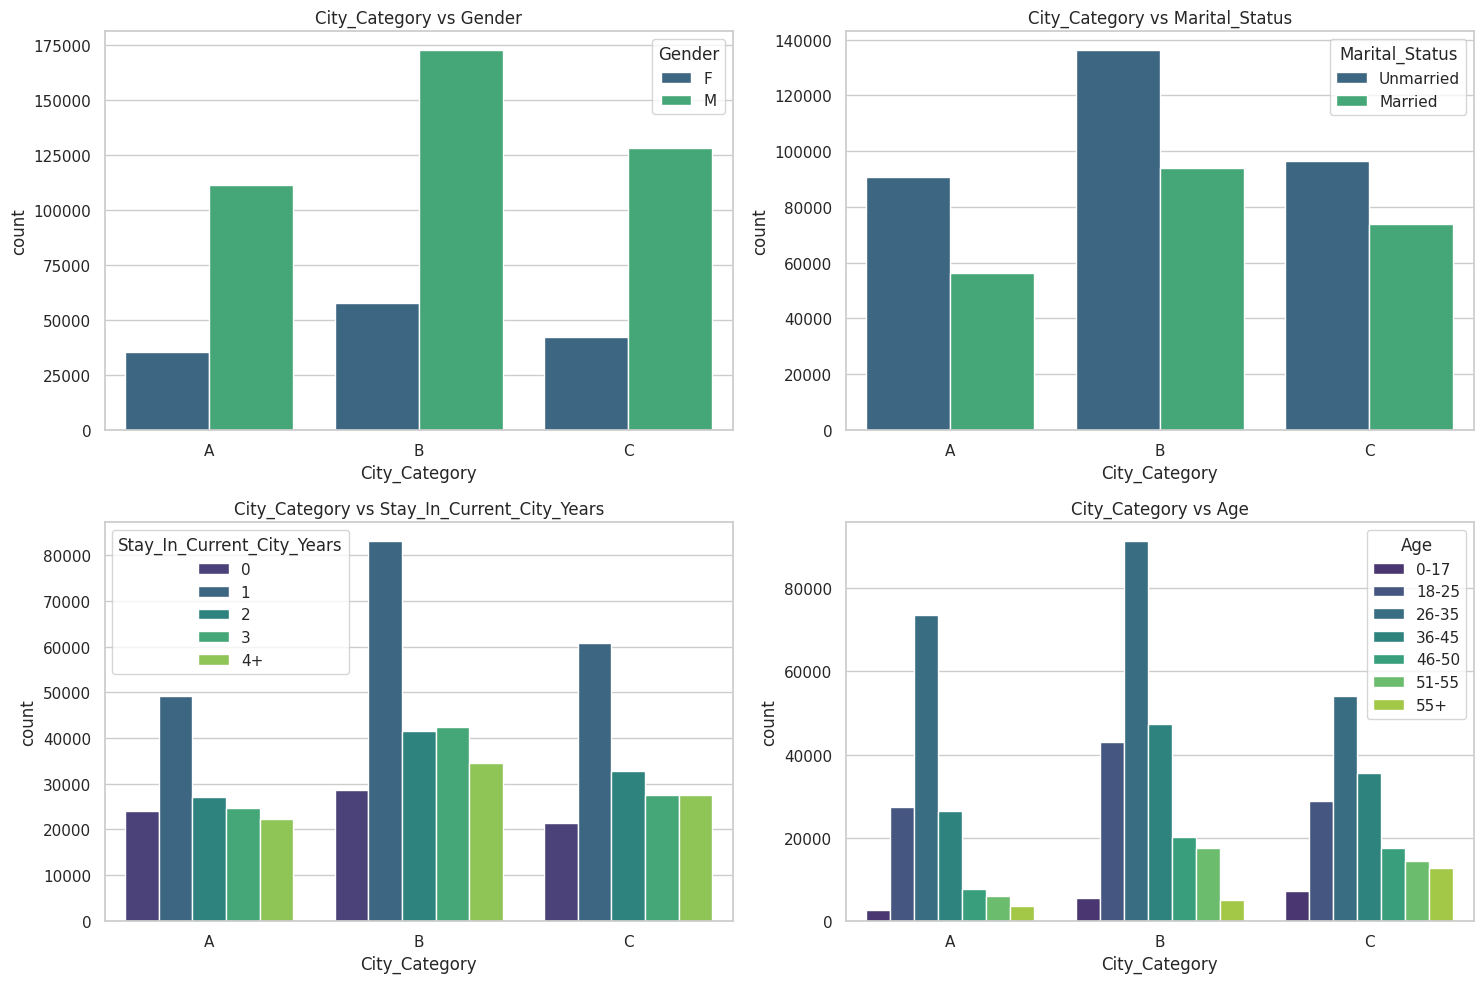

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender vs Marital_Status
count_plot_analysis(df, "City_Category", "Gender", axes[0, 0])

# Gender vs City_Category
count_plot_analysis(df, "City_Category", "Marital_Status", axes[0, 1])

# Gender vs Stay_In_Current_City_Years
count_plot_analysis(df, "City_Category", "Stay_In_Current_City_Years", axes[1, 0])

# Gender vs Age
count_plot_analysis(df, "City_Category", "Age", axes[1, 1])

plt.tight_layout()
plt.show()


Insights:
- From the graph, we can infer that there is a clear dominance of purchase done in City B with respect to Marital Status, Gender, Stay in Current City (in years) and Age Group.

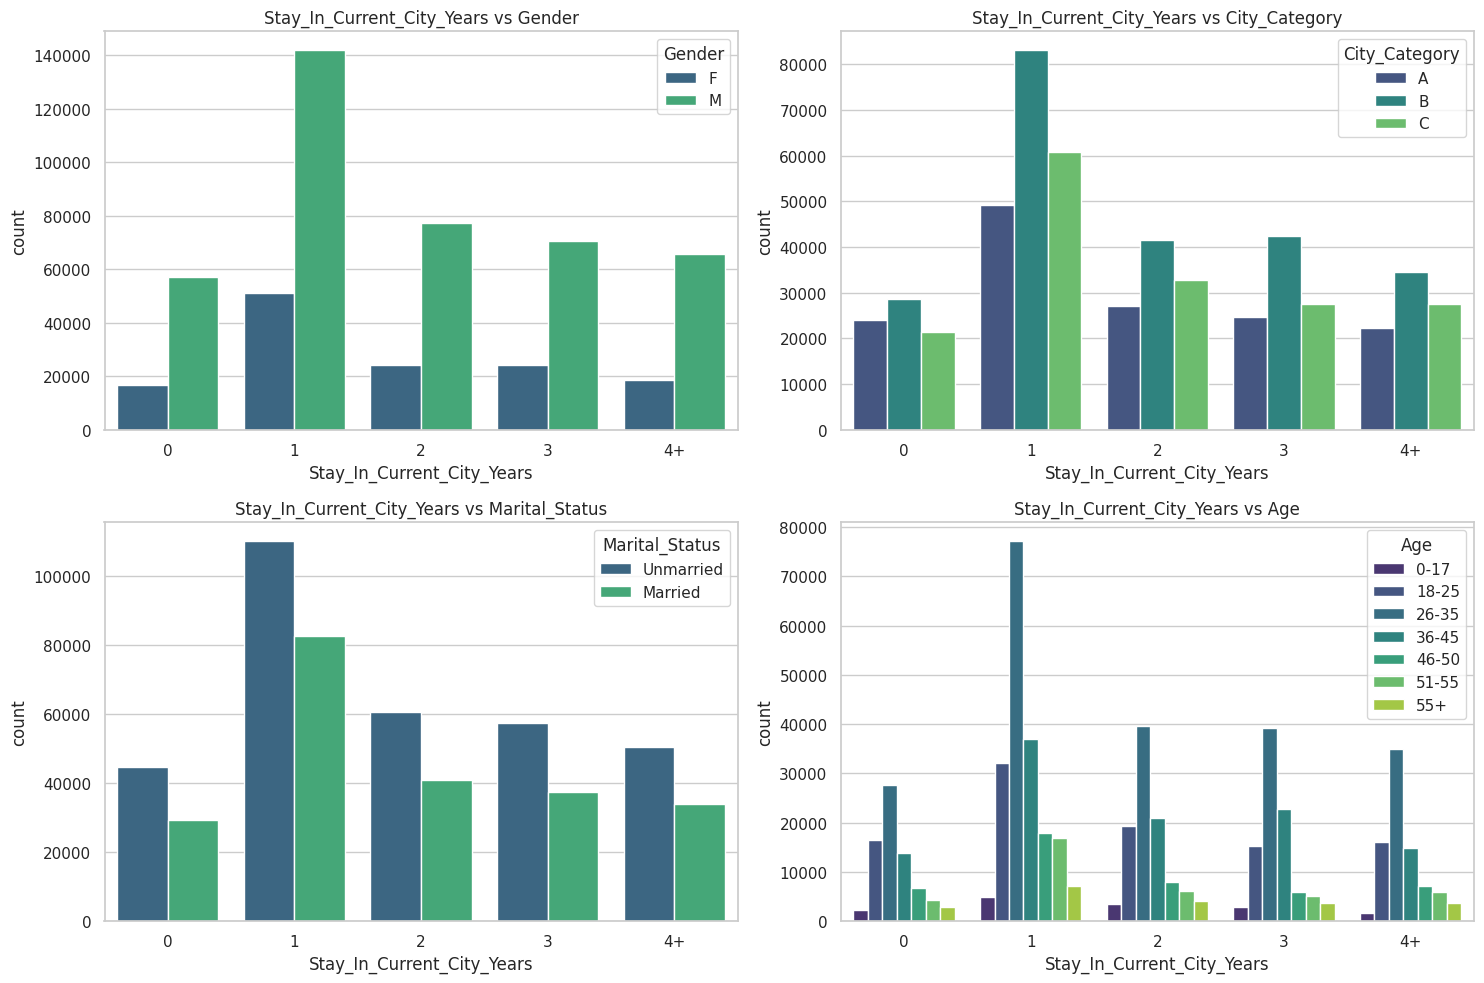

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender vs Marital_Status
count_plot_analysis(df, "Stay_In_Current_City_Years", "Gender", axes[0, 0])

# Gender vs City_Category
count_plot_analysis(df, "Stay_In_Current_City_Years", "City_Category", axes[0, 1])

# Gender vs Stay_In_Current_City_Years
count_plot_analysis(df, "Stay_In_Current_City_Years", "Marital_Status", axes[1, 0])

# Gender vs Age
count_plot_analysis(df, "Stay_In_Current_City_Years", "Age", axes[1, 1])

plt.tight_layout()
plt.show()


Insights:
- From the graph, we can infer that there is a clear dominance of purchase done by customers staying in current city for 1 year with respect to City Category, Gender, Marital Status and Age Group.

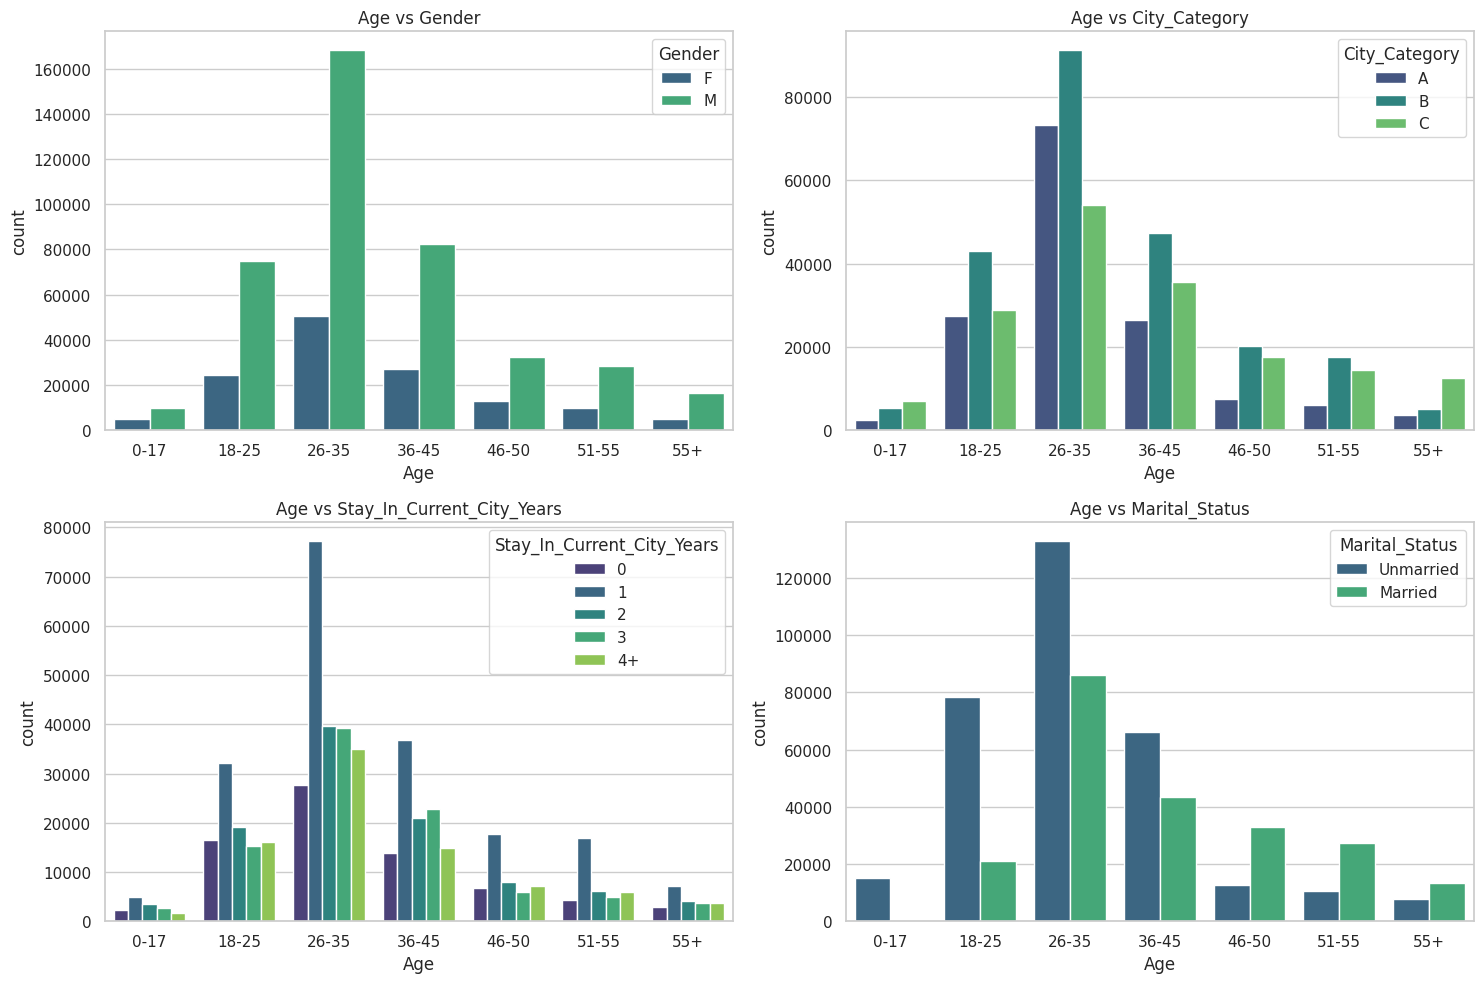

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender vs Marital_Status
count_plot_analysis(df, "Age", "Gender", axes[0, 0])

# Gender vs City_Category
count_plot_analysis(df, "Age", "City_Category", axes[0, 1])

# Gender vs Stay_In_Current_City_Years
count_plot_analysis(df, "Age", "Stay_In_Current_City_Years", axes[1, 0])

# Gender vs Age
count_plot_analysis(df, "Age", "Marital_Status", axes[1, 1])

plt.tight_layout()
plt.show()


Insights:
- From the graph, we can infer that there is a clear dominance of purchase done by 26-35 aged customers with respect to City Category, Gender, Stay in Current City (in years) and Marital Status.

## 4. Gender vs Purchase Analysis

In [ ]:
# Finding Gender Based Money per Transaction
gender_purchase = df.groupby("Gender").agg(Count_Purchase=("Purchase", "sum"), Sum_Purchase=("Purchase", "sum"), Avg_Purchase=("Purchase", "mean")).reset_index()
gender_purchase["Percentage_of_Sum"] = np.round(gender_purchase["Sum_Purchase"] / gender_purchase["Sum_Purchase"].sum() * 100, 2)
gender_purchase["Gender"] = gender_purchase["Gender"].replace({"M":"Male", "F": "Female"})
gender_purchase

Gender  Count_Purchase  Sum_Purchase  Avg_Purchase  Percentage_of_Sum
0  Female      1172499251    1172499251   8671.049039              23.29
1    Male      3861104315    3861104315   9367.724355              76.71

In [ ]:
def purchase_analsis(df, specific_df, col):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot bar chart
    sns.barplot(x=col, y='Avg_Purchase', data=specific_df, palette='viridis', ax=axes[0, 0])
    axes[0, 0].set_xlabel(col)
    axes[0, 0].set_ylabel('Average Purchase Amount')
    axes[0, 0].set_title(f'Average Purchase Amount by {col}')

    # Add percentage labels to the bar plot
    total = specific_df['Avg_Purchase'].sum()
    for p in axes[0, 0].patches:
        height = p.get_height()
        percentage = (height / total) * 100
        axes[0, 0].text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.2f}%', ha='center')

    # Plot pie chart
    axes[0, 1].pie(specific_df['Percentage_of_Sum'], labels=specific_df[col], autopct='%1.1f%%', startangle=6.7, colors=["#D35400", "#2980B9",'#27AE60'])
    axes[0, 1].set_title(f'Percentage of Sum of Purchases by {col}')
    axes[0, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    gs = axes[1, 0].get_gridspec()
    for ax in axes[1, :]:
        ax.remove()
    axbig = fig.add_subplot(gs[1, :])

    # Plot KDE plot
    sns.kdeplot(data=df, x='Purchase', hue=col, fill=True, palette='viridis', alpha=0.5, ax=axbig)
    axbig.set_xlabel('Purchase Amount')
    axbig.set_ylabel('Density')
    axbig.set_title(f'KDE Plot of Purchase Amount by {col}')
    axbig.legend()

    plt.tight_layout()
    plt.show()


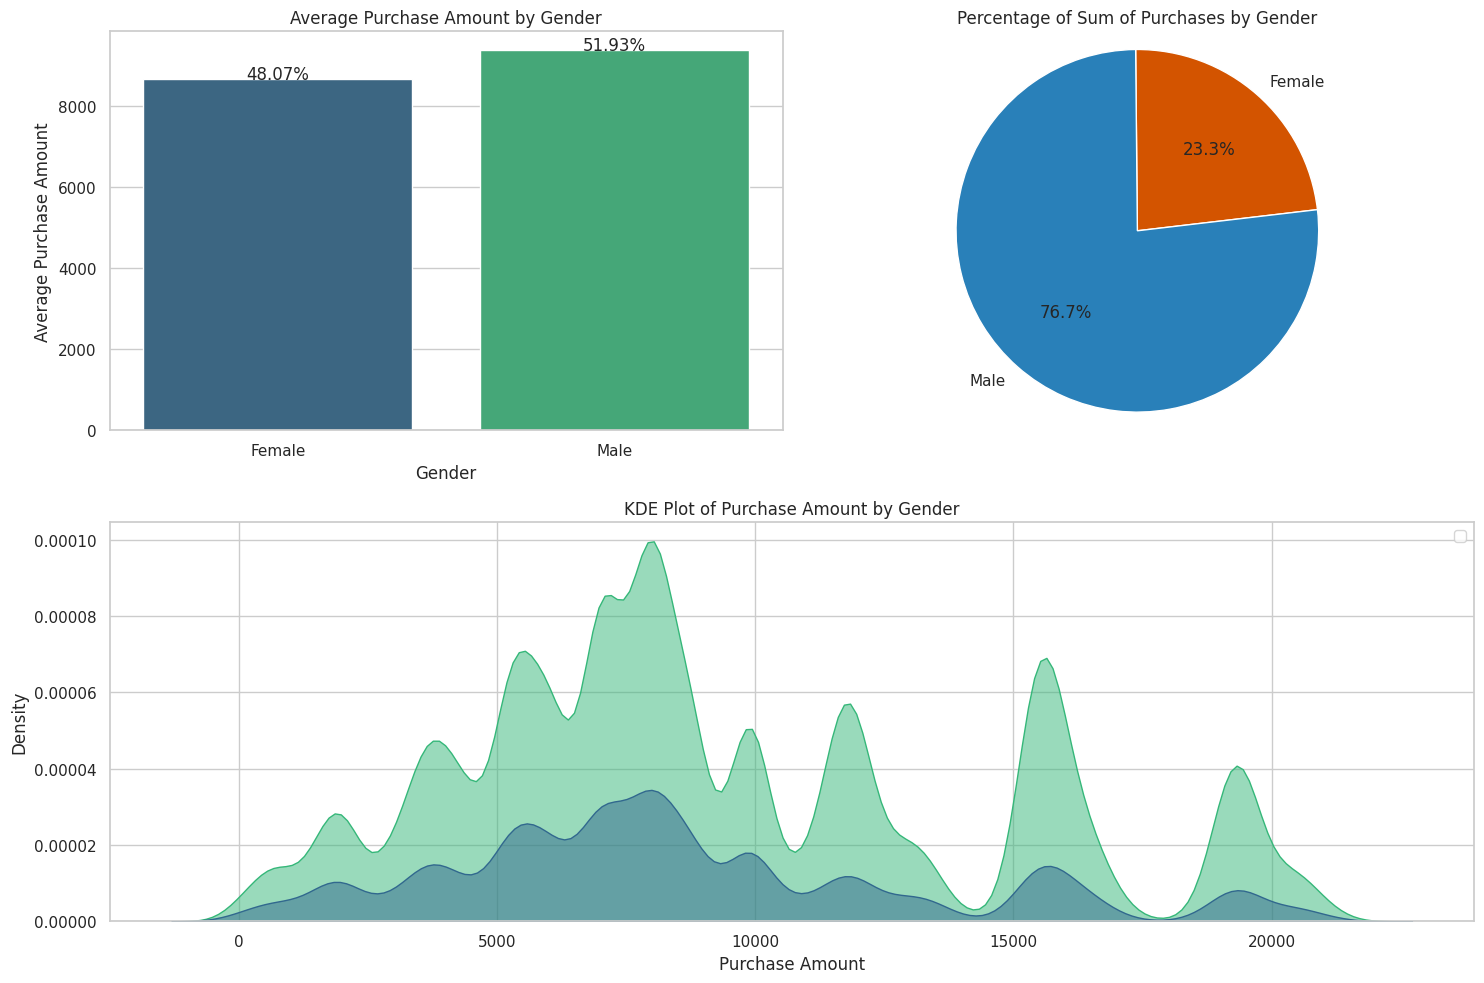

In [ ]:
purchase_analsis(df, gender_purchase, "Gender")

Insights:
- Based on the visuals, Male's average purchase amount per transaction (51.93%) is higher than the Female's average purchase amount per transaction (48.07%)
- Likewise, the total purchase amount spent by Male was more when compared to female which is approximately 3/4th of the total purchase amount spent.
- From the KDE plot, we came to know that the purchase amount is not normally distributed and it's right skewed for both Male and Female.

### Analysing the Confidence Interval

To analyse the confidence interval, we need to follow the below steps:
- Calculate the Mean and Standard Deviation of the Purchase
- Calculate the Standard Error
- Calculate the Confidence Interval

Note: To achieve this, we need to have the normal distribution of the data. Hence, we will go for Central Limit Theorem to make the data normally distributed.

In [ ]:
def plot_sample_means(arr_df, confidence_interval, label_arr, color):
    no_of_agents = 20000
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'{confidence_interval*100}% Confidence Interval', fontsize=16)
    subplot_no = 1

    ci_data = []

    for n in [100, 1000, 5000, 10000]:  # , 5000, 50000
        new_sample = []
        sample_mean = []
        for data in arr_df:
            new_sample.append(np.random.choice(a=data, size=(no_of_agents, n)))  # (rows, cols)
            sample_mean.append(new_sample[-1].mean(axis=1))

        plt.subplot(2, 2, subplot_no)
        plt.title(f"{no_of_agents} sample means; sample size (n) = {n}")

        for i in range(len(sample_mean)):
            sns.histplot(x=sample_mean[i], stat="probability", kde=True, label=f"{label_arr[i]} Sample", color=color[i])

        # Calculate confidence intervals
        ci_arr = []
        for i in range(len(sample_mean)):
            ci = norm.interval(confidence_interval, loc=sample_mean[i].mean(), scale=sample_mean[i].std())
            ci_arr.append(ci)
            ci_data.append({
                'Confidence Interval': int(confidence_interval * 100),
                'Sample': label_arr[i],
                'Sample Size': n,
                'Lower Limit': ci[0],
                'Upper Limit': ci[1]
            })

        # Add vertical lines for confidence intervals
        for i in range(len(sample_mean)):
            plt.axvline(ci_arr[i][0], color=color[i], linestyle='--', label=f"{label_arr[i]} {confidence_interval*100:.0f}% CI" if subplot_no == 1 else "")
            plt.axvline(ci_arr[i][1], color=color[i], linestyle='--')

        plt.xlabel(f"n={n}; " + "; ".join([f"{label_arr[i]}_m={sample_mean[i].mean():.1f}; {label_arr[i]}_se={sample_mean[i].std():.2f}" for i in range(len(sample_mean))]))
        plt.legend()
        subplot_no += 1
    plt.tight_layout()
    plt.show()
    return pd.DataFrame(ci_data)


In [ ]:
arr_df = [df.loc[df['Gender'] == "M", "Purchase"], df.loc[df['Gender'] == "F", "Purchase"]]
label_arr = ["Male", "Female"]
color = ["orange", "green"]

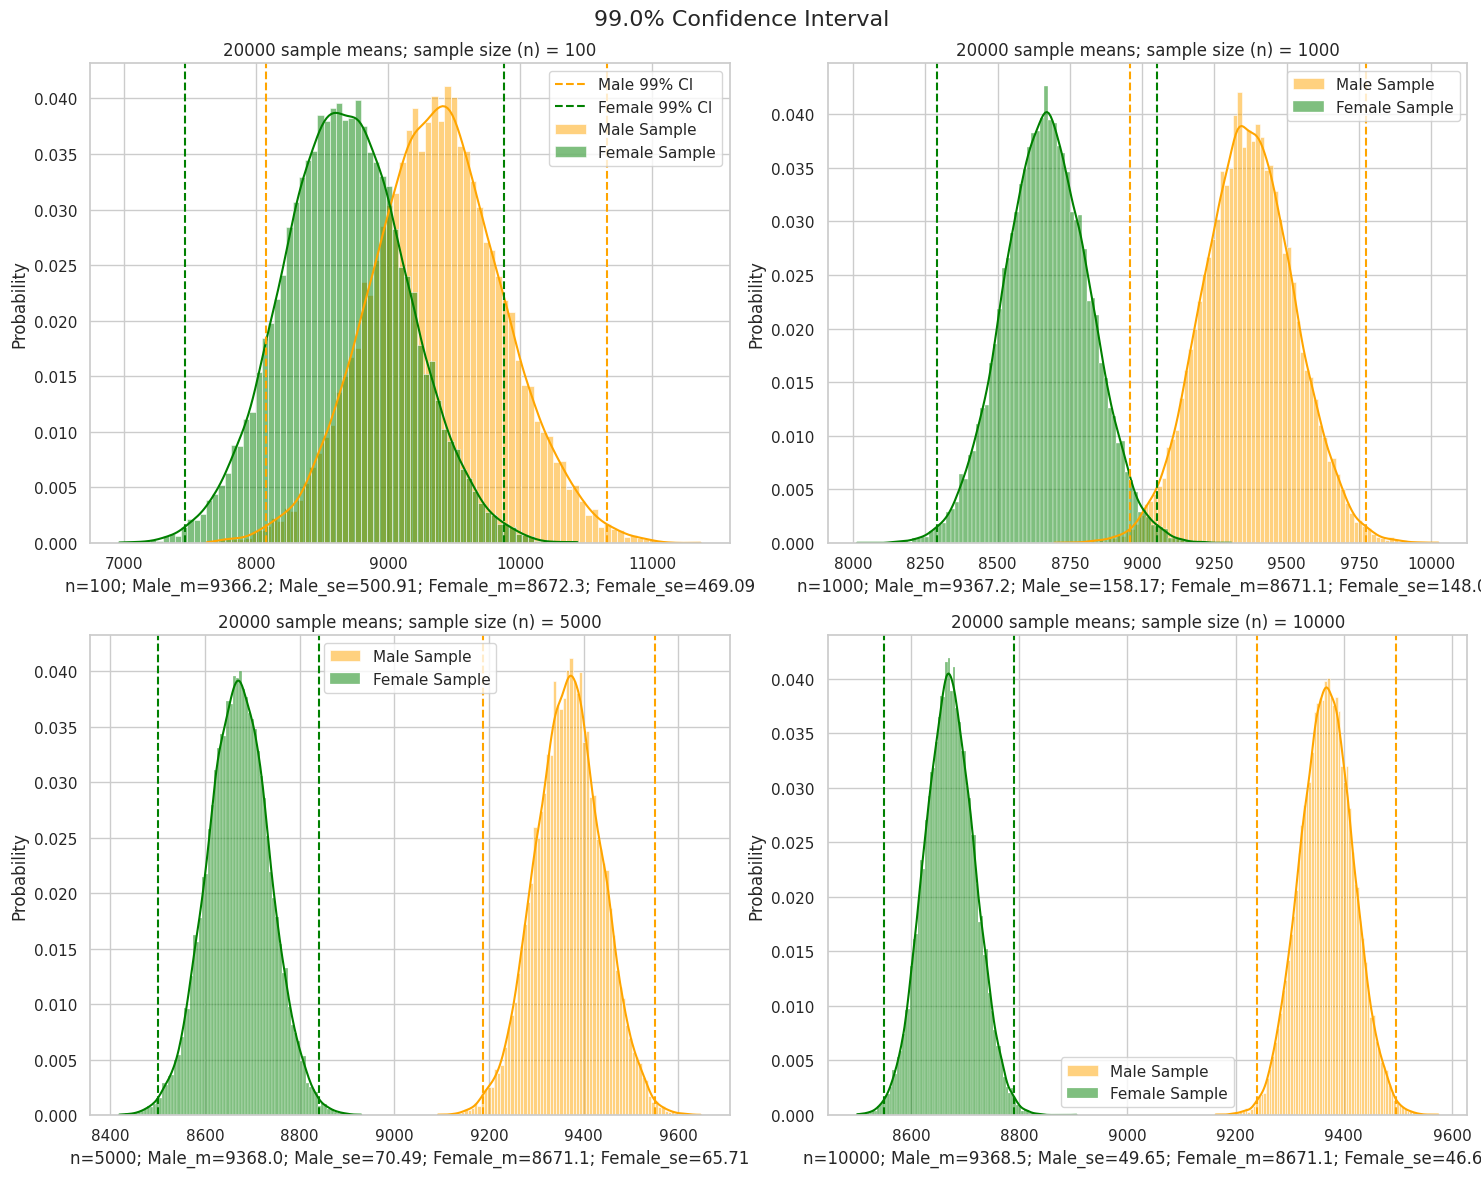

In [ ]:
confidence_interval = 0.99
ci_99 = plot_sample_means(arr_df, confidence_interval, label_arr, color)

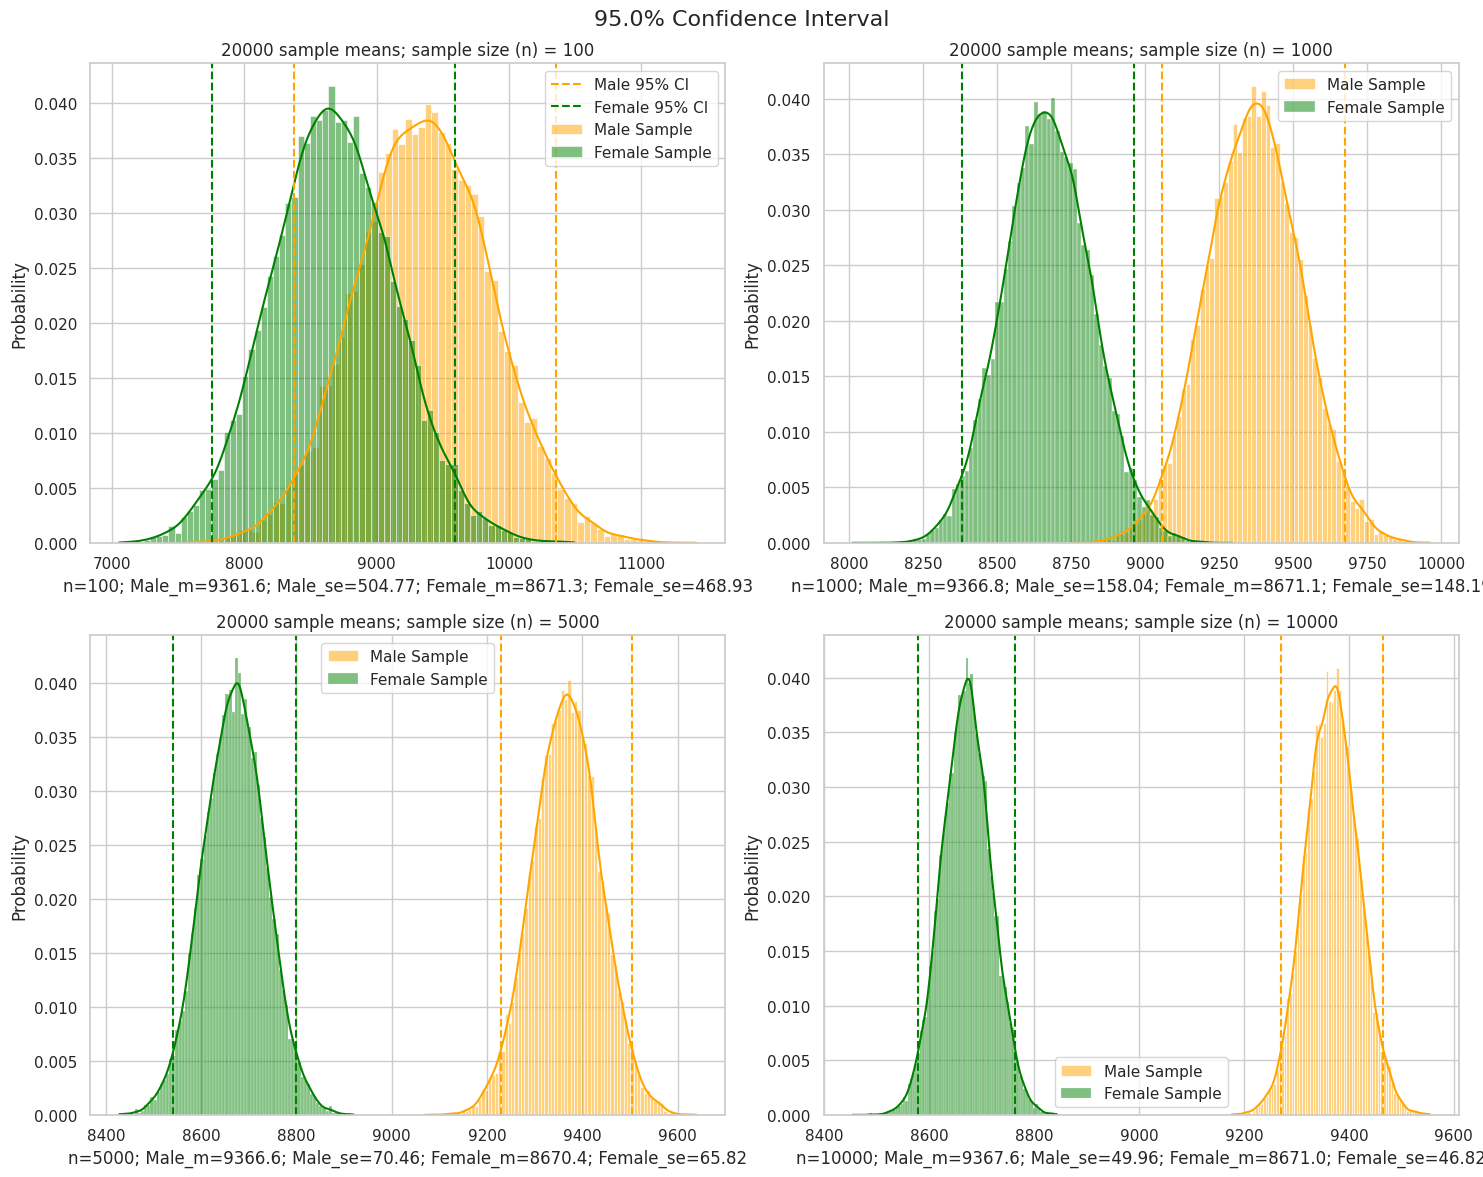

In [ ]:
confidence_interval = 0.95
ci_95 = plot_sample_means(arr_df, confidence_interval, label_arr, color)

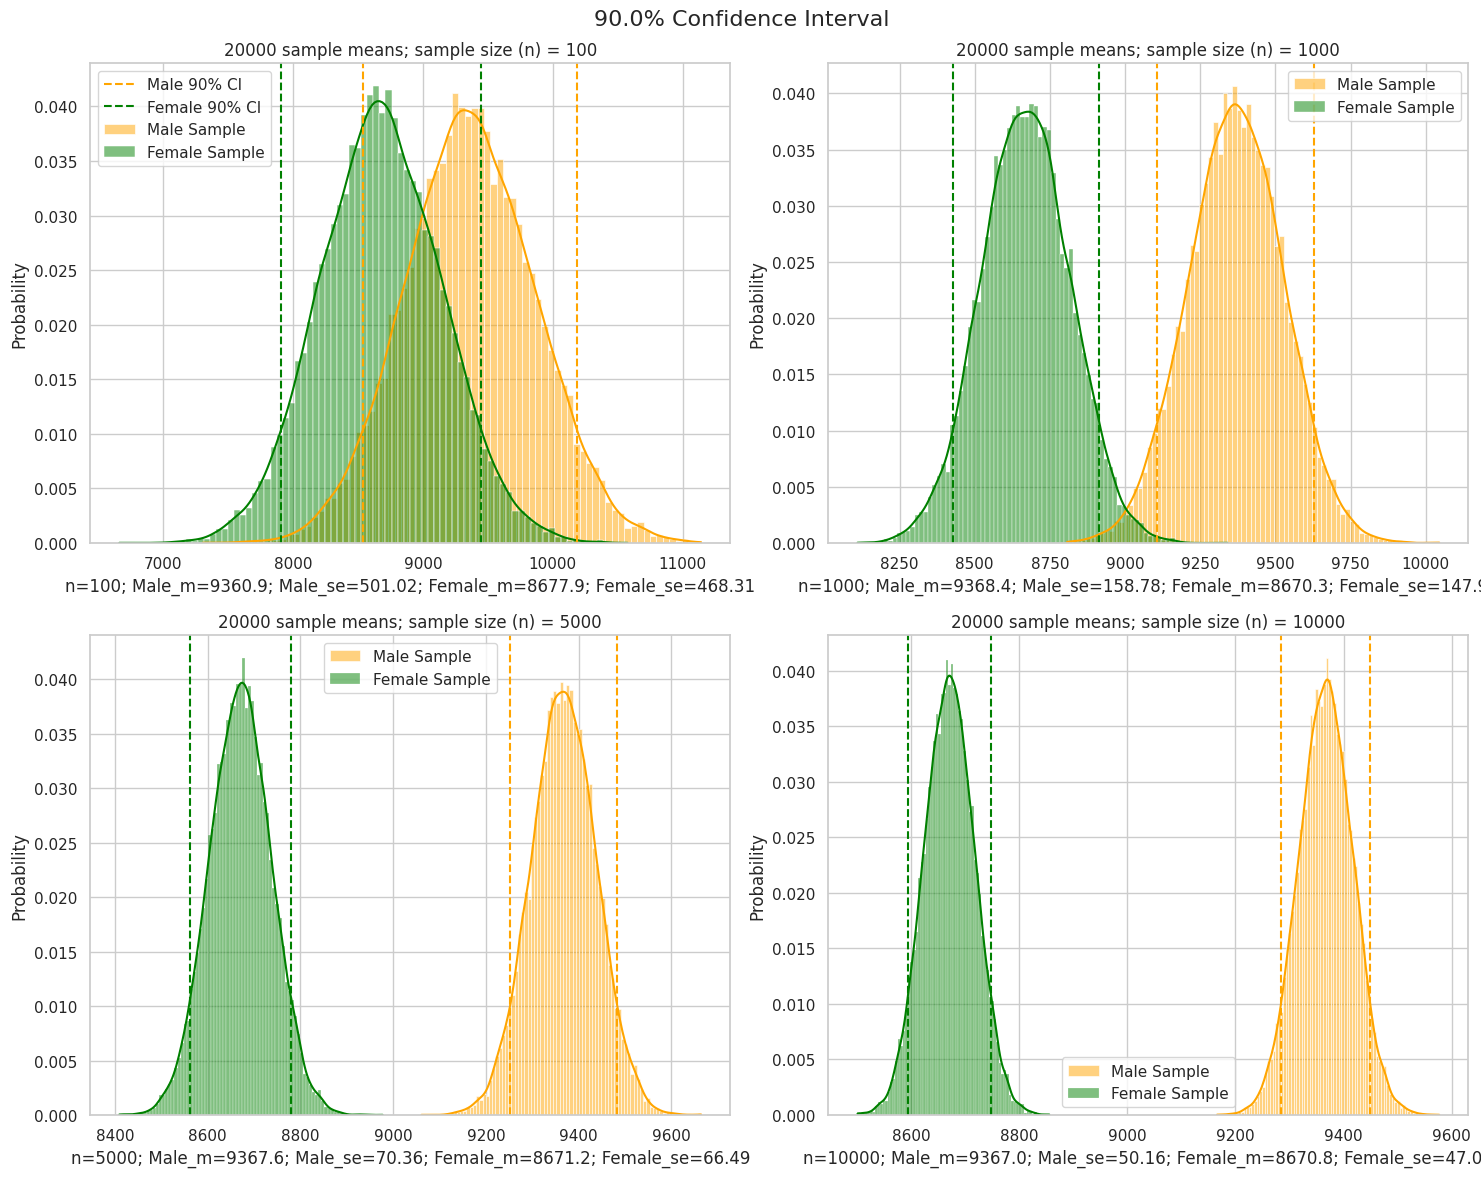

In [ ]:
confidence_interval = 0.90
ci_90 = plot_sample_means(arr_df, confidence_interval, label_arr, color)

In [ ]:
# Concatenate the DataFrames
ci_combined = pd.concat([ci_99, ci_95, ci_90], axis=1)
ci_combined.reset_index(drop=True, inplace=True)
ci_combined

Confidence Interval  Sample  Sample Size  Lower Limit   Upper Limit  \
0                   99    Male          100  8075.914862  10656.456061   
1                   99  Female          100  7464.020517   9880.612371   
2                   99    Male         1000  8959.791137   9774.633593   
3                   99  Female         1000  8289.798990   9052.457489   
4                   99    Male         5000  9186.466092   9549.626565   
5                   99  Female         5000  8501.810092   8840.334791   
6                   99    Male        10000  9240.613509   9496.378242   
7                   99  Female        10000  8550.942182   8791.305071   

   Confidence Interval  Sample  Sample Size  Lower Limit   Upper Limit  \
0                   95    Male          100  8372.278764  10350.959010   
1                   95  Female          100  7752.194132   9590.374887   
2                   95    Male         1000  9057.014849   9676.530937   
3                   95  Female         1000  8380.656757   8961.533943   
4                   95    Male         5000  9228.466608   9504.670957   
5                   95  Female         5000  8541.359135   8799.360741   
6                   95    Male        10000  9269.701420   9465.551472   
7                   95  Female        10000  8579.226437   8762.755454   

   Confidence Interval  Sample  Sample Size  Lower Limit   Upper Limit  
0                   90    Male          100  8536.827372  10185.028366  
1                   90  Female          100  7907.632447   9448.221581  
2                   90    Male         1000  9107.207340   9629.559407  
3                   90  Female         1000  8426.983191   8913.542528  
4                   90    Male         5000  9251.896062   9483.366026  
5                   90  Female         5000  8561.810847   8780.536368  
6                   90    Male        10000  9284.497002   9449.499158  
7                   90  Female        10000  8593.423709   8748.138561

Insights:
- Using CLT we can infer the fact that the confidence interval for the purchase amount is narrowed down and was so precise when the sample size is increased. This will help the business to make better decisions.
- For the sample size chosen (except 100), the confidence interval is not overlapping which indicates that there is a significant difference in the purchase amount between Male and Female.
- For 99% confidence interval and the sample size of 5000 and 10000, the confidence interval is not overlapping and the intervals are found to be (9238.14, 9496.57) and (8549.99, 8791.78) for males and females respectively.
- This analysis indicates that male customers spend more per transaction on Black Friday. This consistent finding across various sample sizes, supported by high confidence intervals, provides valuable insight for the business.

### How can Walmart leverage this conclusion to make changes or improvements?

- Walmart can use this information to tailor their marketing strategies to target Male customers more effectively. For example, they could offer more promotions or discounts on products that are popular.
- Walmart could also use this information to improve their product offerings. For example, they could introduce more products that are popular with female to increase the sale.

## 5. Marital Status vs Purchase Analysis

In [ ]:
# Finding Gender Based Money per Transaction
martital_purchase = df.groupby("Marital_Status").agg(Count_Purchase=("Purchase", "sum"), Sum_Purchase=("Purchase", "sum"), Avg_Purchase=("Purchase", "mean")).reset_index()
martital_purchase["Percentage_of_Sum"] = np.round(martital_purchase["Sum_Purchase"] / martital_purchase["Sum_Purchase"].sum() * 100, 2)
martital_purchase["Marital_Status"] = martital_purchase["Marital_Status"]
martital_purchase

Marital_Status  Count_Purchase  Sum_Purchase  Avg_Purchase  \
0      Unmarried      2974337720    2974337720   9201.581849   
1        Married      2059265846    2059265846   9187.040076   

   Percentage_of_Sum  
0              59.09  
1              40.91

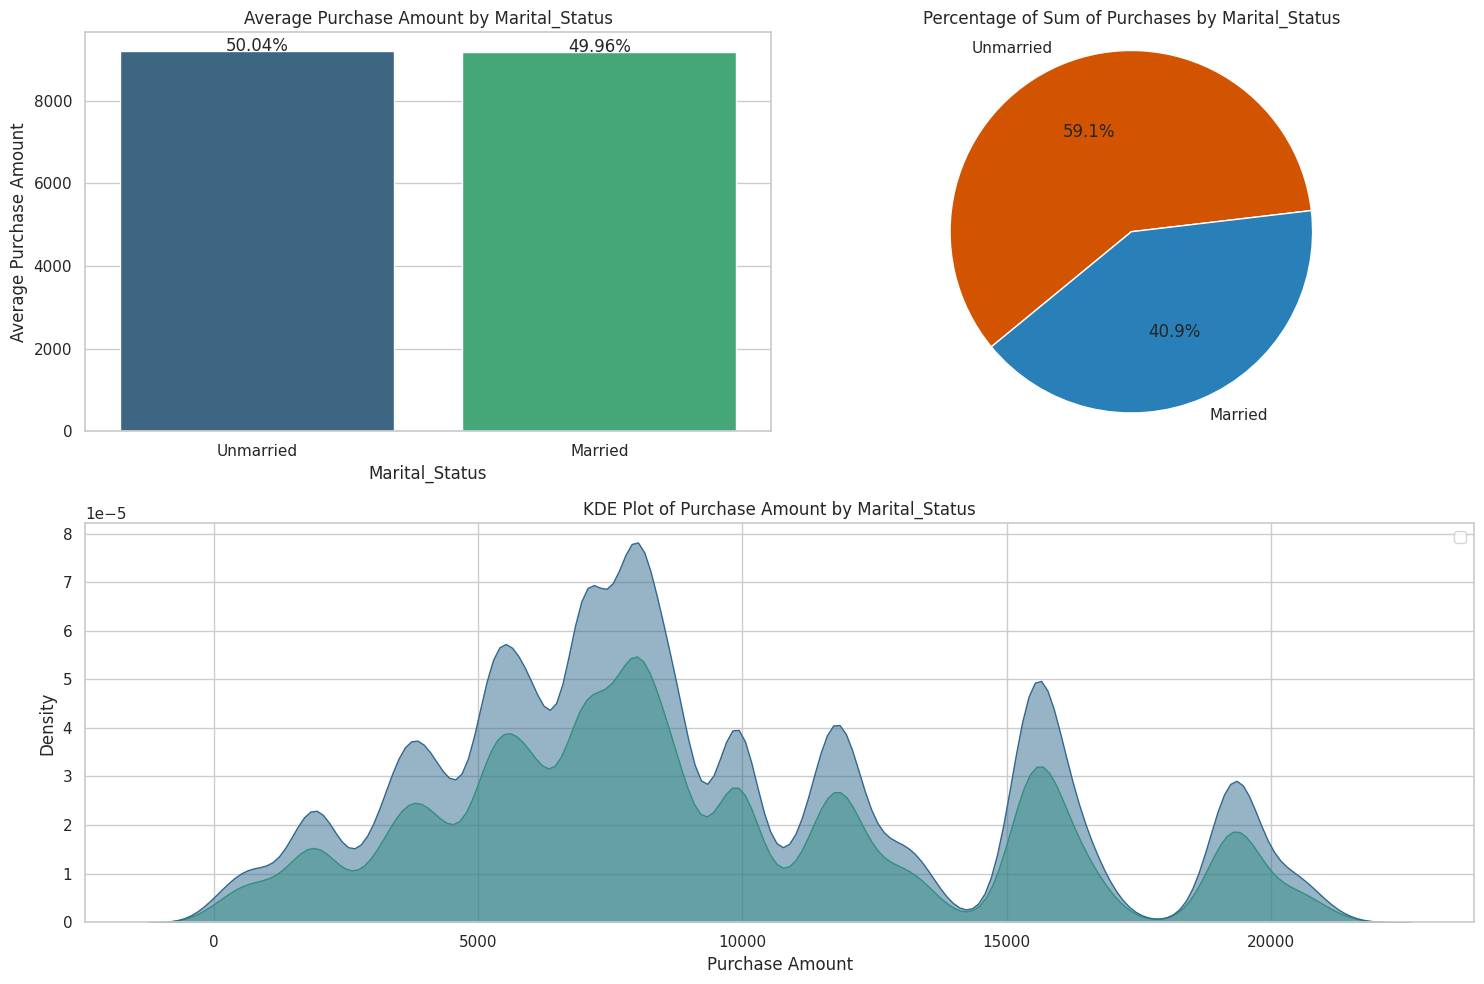

In [ ]:
purchase_analsis(df, martital_purchase, "Marital_Status")

Insights:
- Based on the visuals, Unmarried's average purchase amount per transaction (50.04%) is slightly higher than the Married's average purchase amount per transaction (49.96%)
- Likewise, the total purchase amount spent by Unmarried was more when compared to Married which is approximately 59% of the total purchase amount spent.
- From the KDE plot, we came to know that the purchase amount is not normally distributed and it's right skewed for both Married and Unmarried category.

### Analysing the Confidence Interval

To analyse the confidence interval, we need to follow the below steps:
- Calculate the Mean and Standard Deviation of the Purchase
- Calculate the Standard Error
- Calculate the Confidence Interval

Note: To achieve this, we need to have the normal distribution of the data. Hence, we will go for Central Limit Theorem to make the data normally distributed.

In [ ]:
arr_df = [df.loc[df['Marital_Status'] == "Unmarried", "Purchase"], df.loc[df['Marital_Status'] == "Married", "Purchase"]]
label_arr = ["Unmarried", "Married"]
color = ["orange", "green"]

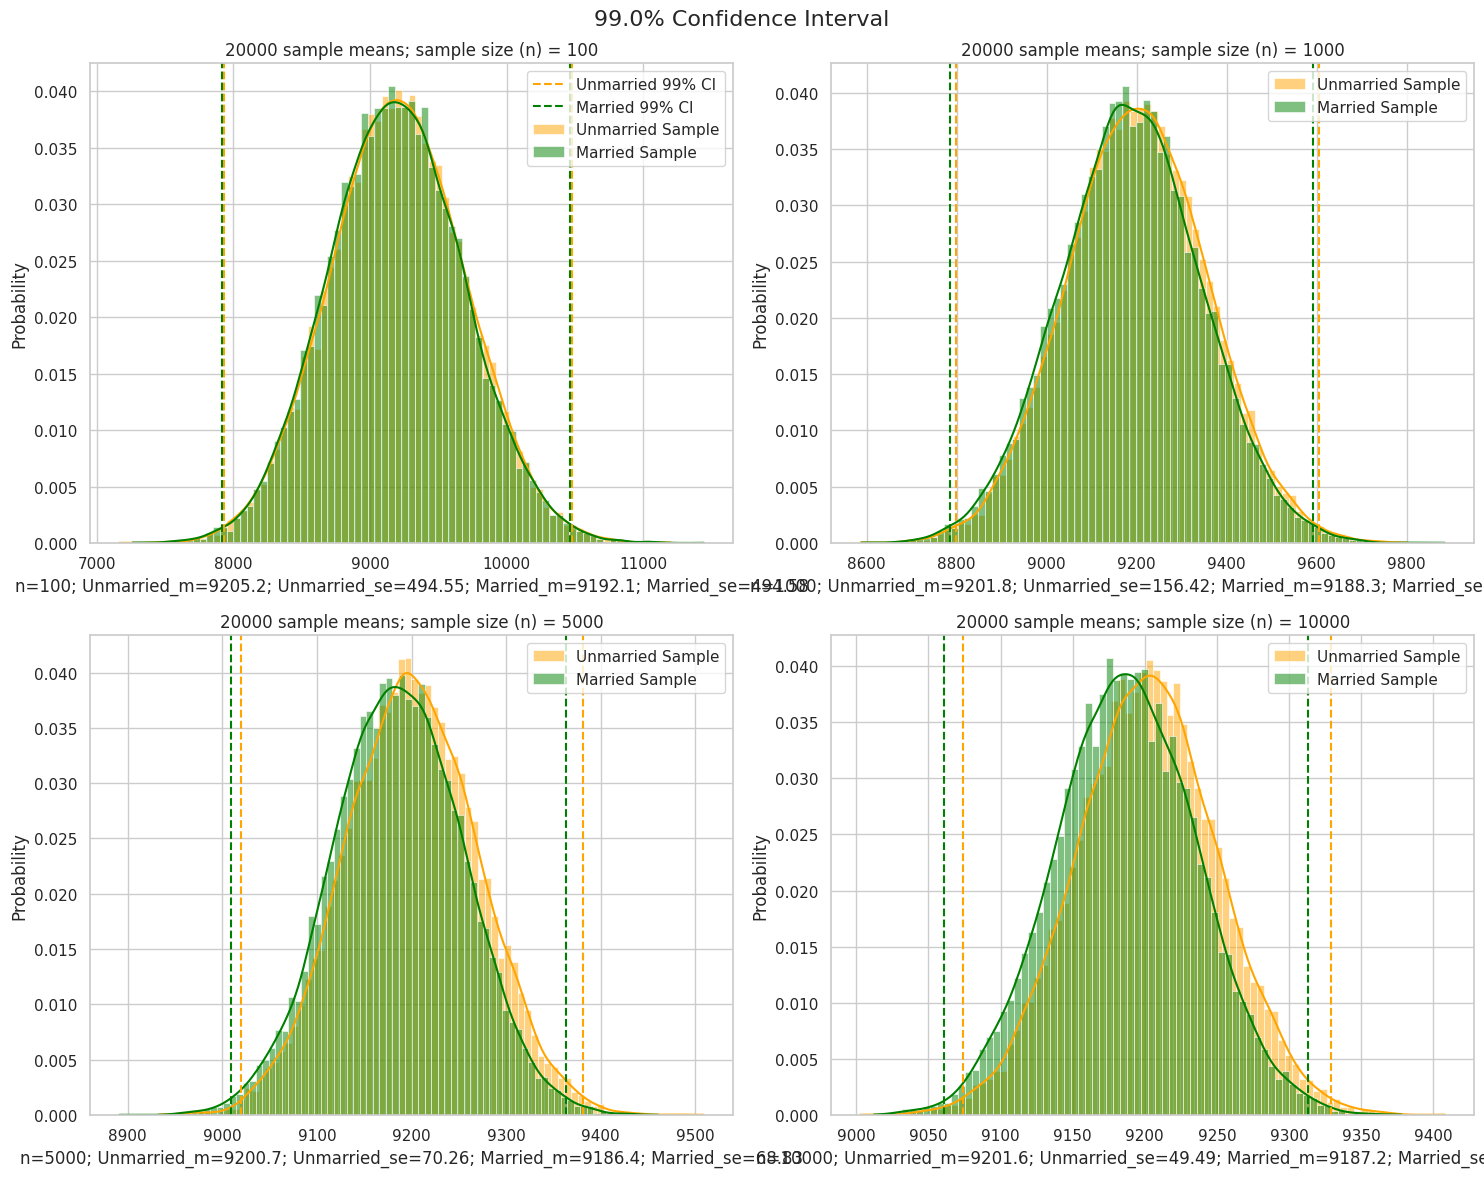

In [ ]:
confidence_interval = 0.99
ci_99 = plot_sample_means(arr_df, confidence_interval, label_arr, color)

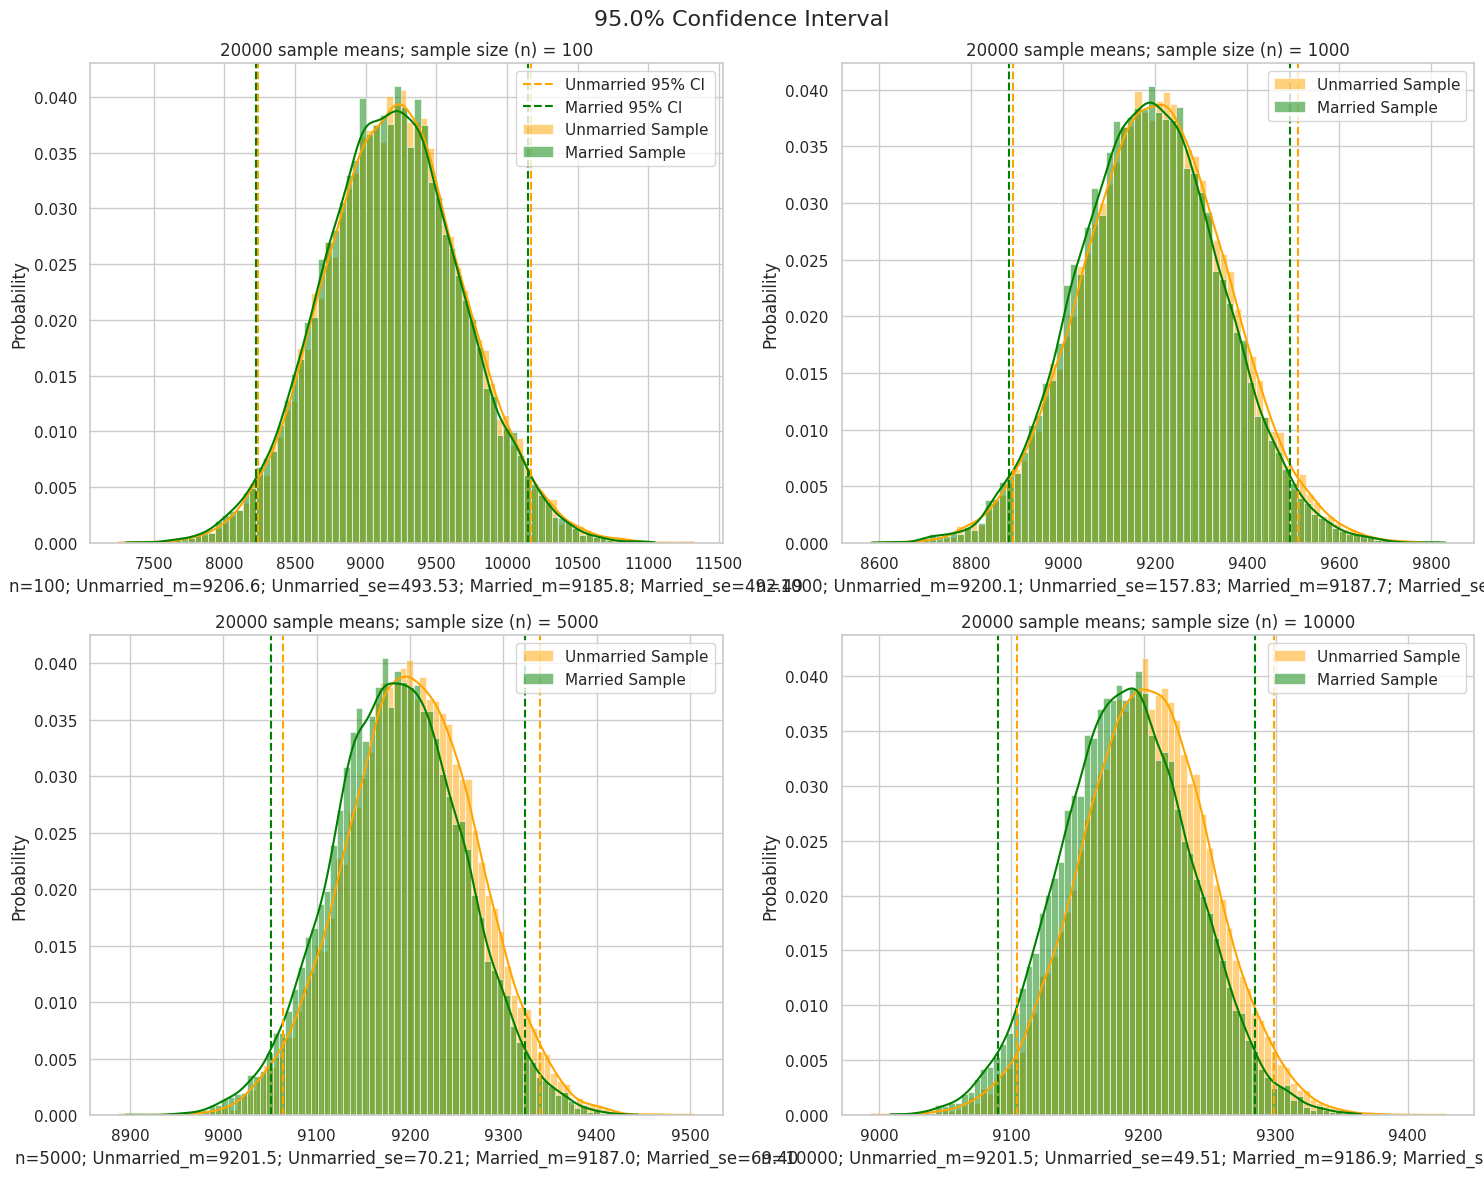

In [ ]:
confidence_interval = 0.95
ci_95 = plot_sample_means(arr_df, confidence_interval, label_arr, color)

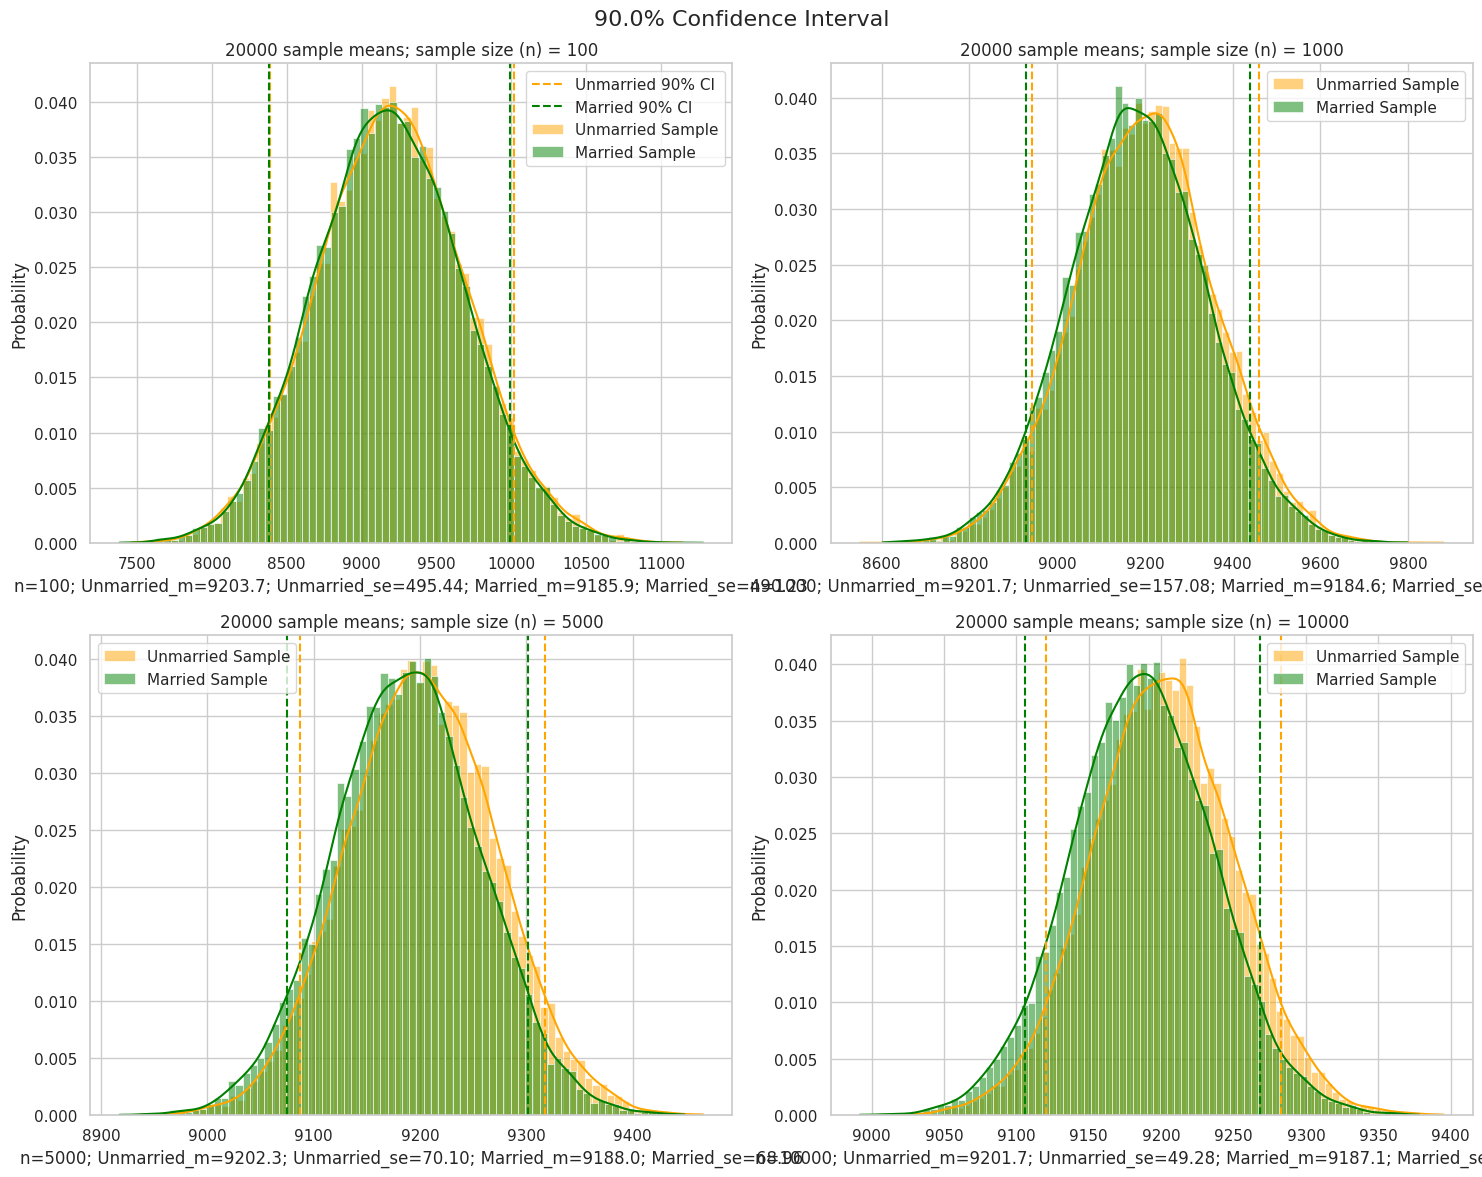

In [ ]:
confidence_interval = 0.90
ci_90 = plot_sample_means(arr_df, confidence_interval, label_arr, color)

In [ ]:
# Concatenate the DataFrames
ci_combined = pd.concat([ci_99, ci_95, ci_90], axis=1)
ci_combined.reset_index(drop=True, inplace=True)
ci_combined

Confidence Interval     Sample  Sample Size  Lower Limit   Upper Limit  \
0                   99  Unmarried          100  7931.342064  10479.082414   
1                   99    Married          100  7918.180725  10466.087717   
2                   99  Unmarried         1000  8798.869964   9604.674905   
3                   99    Married         1000  8785.284495   9591.380999   
4                   99  Unmarried         5000  9019.762780   9381.719972   
5                   99    Married         5000  9009.074843   9363.664563   
6                   99  Unmarried        10000  9074.160607   9329.139255   
7                   99    Married        10000  9061.052819   9313.266189   

   Confidence Interval     Sample  Sample Size  Lower Limit   Upper Limit  \
0                   95  Unmarried          100  8239.336024  10173.937023   
1                   95    Married          100  8220.545646  10151.060181   
2                   95  Unmarried         1000  8890.803696   9509.477954   
3                   95    Married         1000  8882.957301   9492.531591   
4                   95  Unmarried         5000  9063.921854   9339.149852   
5                   95    Married         5000  9050.978370   9323.040060   
6                   95  Unmarried        10000  9104.450547   9298.513471   
7                   95    Married        10000  9089.625025   9284.274374   

   Confidence Interval     Sample  Sample Size  Lower Limit   Upper Limit  
0                   90  Unmarried          100  8388.752264  10018.593068  
1                   90    Married          100  8379.585892   9992.305285  
2                   90  Unmarried         1000  8943.347679   9460.094459  
3                   90    Married         1000  8928.969438   9440.289259  
4                   90  Unmarried         5000  9086.997122   9317.610748  
5                   90    Married         5000  9074.570698   9301.417591  
6                   90  Unmarried        10000  9120.588621   9282.712641  
7                   90    Married        10000  9105.948971   9268.220485

Insights:
- Using CLT we can infer the fact that the confidence interval for the purchase amount is narrowed down and was so precise when the sample size is increased. This will help the business to make better decisions.
- For the sample size chosen, the confidence interval is overlapping which indicates that there is no significant difference in the purchase amount between Married and Unmarried.
- For 99%, 95% and 90% confidence interval and the sample size of 100, 1000, 5000 and 10000, the confidence interval is overlapping for both Married and Unmarried.
- This analysis indicates that married customers and unmarried customers are spending similar amount per transaction on Black Friday.

### How can Walmart leverage this conclusion to make changes or improvements?

- Walmart doesn't need to alocate addition marketting resource for any targetted set of people in this case.
- Only a general marketting stategy will be fine to cover both the groups

## 6. Age Group vs Purchase Analysis

In [ ]:
df['Age'] = df['Age'].replace({
    '0-17': '0-17',
    '18-25': '18-25',
    '26-35': '26-35',
    '36-45': '36-50',
    '46-50': '36-50',
    '51-55': '51+ years',
    '55+': '51+ years'
})

In [ ]:
# Finding Gender Based Money per Transaction
age_purchase = df.groupby("Age").agg(Count_Purchase=("Purchase", "sum"), Sum_Purchase=("Purchase", "sum"), Avg_Purchase=("Purchase", "mean")).reset_index()
age_purchase["Percentage_of_Sum"] = np.round(age_purchase["Sum_Purchase"] / age_purchase["Sum_Purchase"].sum() * 100, 2)
age_purchase["Age"] = age_purchase["Age"]
age_purchase

Age  Count_Purchase  Sum_Purchase  Avg_Purchase  Percentage_of_Sum
0       0-17       133295464     133295464   8867.447046               2.65
1      18-25       906326568     906326568   9124.031731              18.01
2      26-35      2010253327    2010253327   9193.469924              39.94
3      36-50      1427332350    1427332350   9217.456458              28.36
4  51+ years       556395857     556395857   9349.148203              11.05

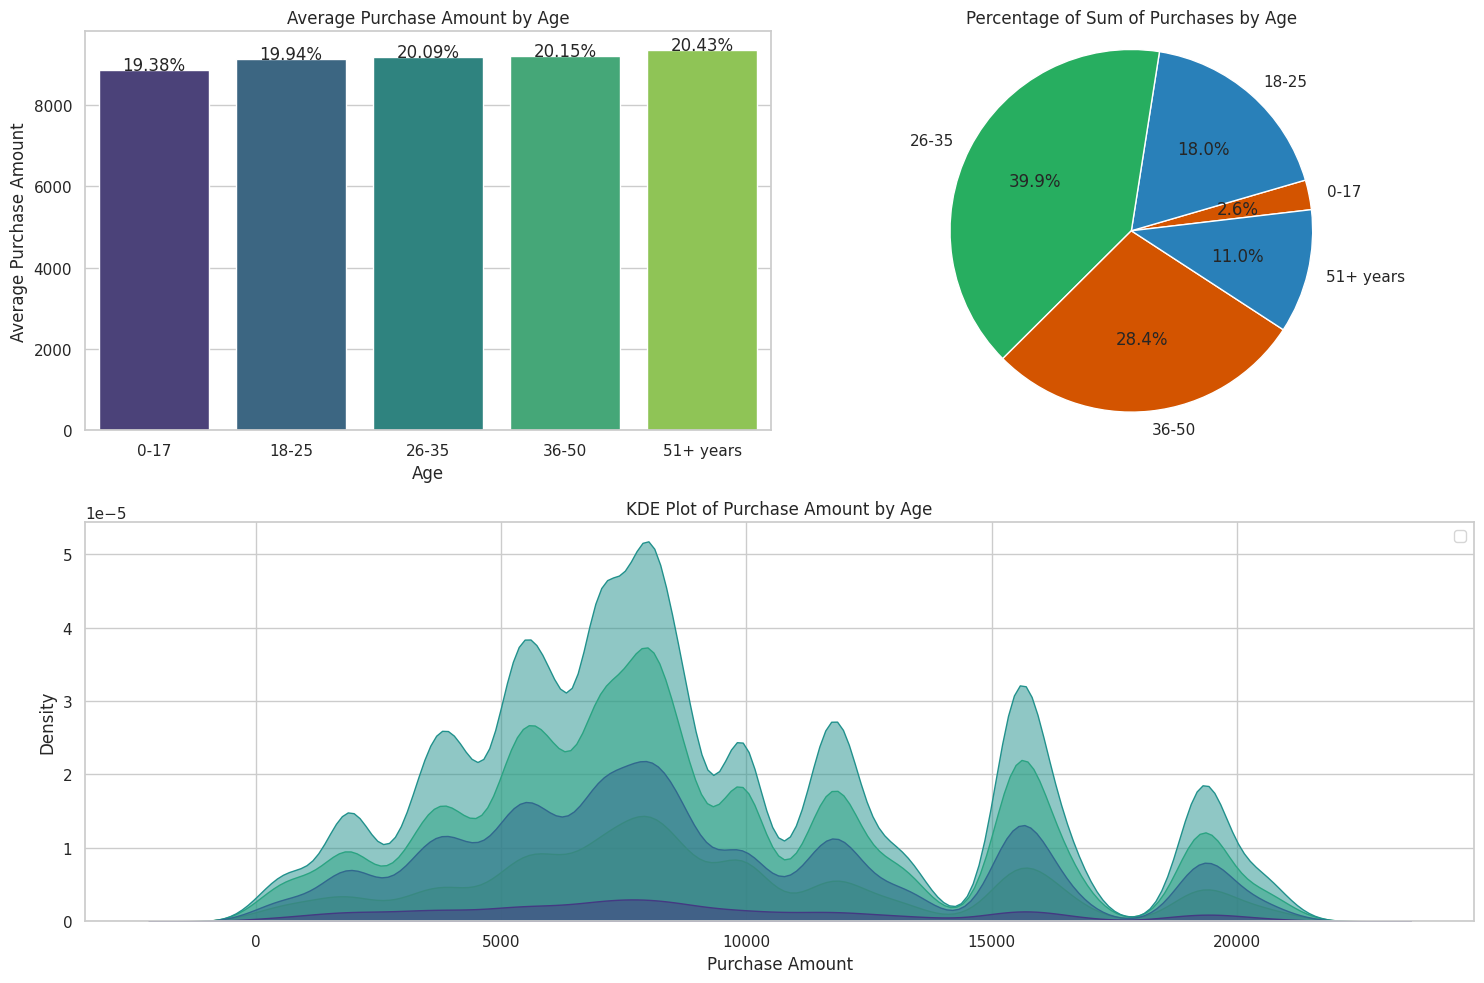

In [ ]:
purchase_analsis(df, age_purchase, "Age")

Insights:
- Based on the visuals, people under the age group of "51+" are having the high average purchase amount per transaction (20.43%) than other groups.
- Surprisingly, the total amount spent by people under the age group of 26-35 is high than other groups.
- From the KDE plot, we came to know that the purchase amount is not normally distributed and it's right skewed for all the age groups.

### Analysing the Confidence Interval

To analyse the confidence interval, we need to follow the below steps:
- Calculate the Mean and Standard Deviation of the Purchase
- Calculate the Standard Error
- Calculate the Confidence Interval

Note: To achieve this, we need to have the normal distribution of the data. Hence, we will go for Central Limit Theorem to make the data normally distributed.


In [ ]:
df['Age'].unique()

['0-17', '51+ years', '26-35', '36-50', '18-25']
Categories (5, object): ['0-17', '18-25', '26-35', '36-50', '51+ years']

In [ ]:
arr_df = [df.loc[df['Age'] == '0-17', "Purchase"], df.loc[df['Age'] == '18-25', "Purchase"], df.loc[df['Age'] == '26-35', "Purchase"], df.loc[df['Age'] == '36-50', "Purchase"], df.loc[df['Age'] == '51+ years', "Purchase"]]
label_arr = ["0-17", "18-25", "26-35", "36-50", "51+"]
color = ["orange", "green", "blue", "red", "yellow"]

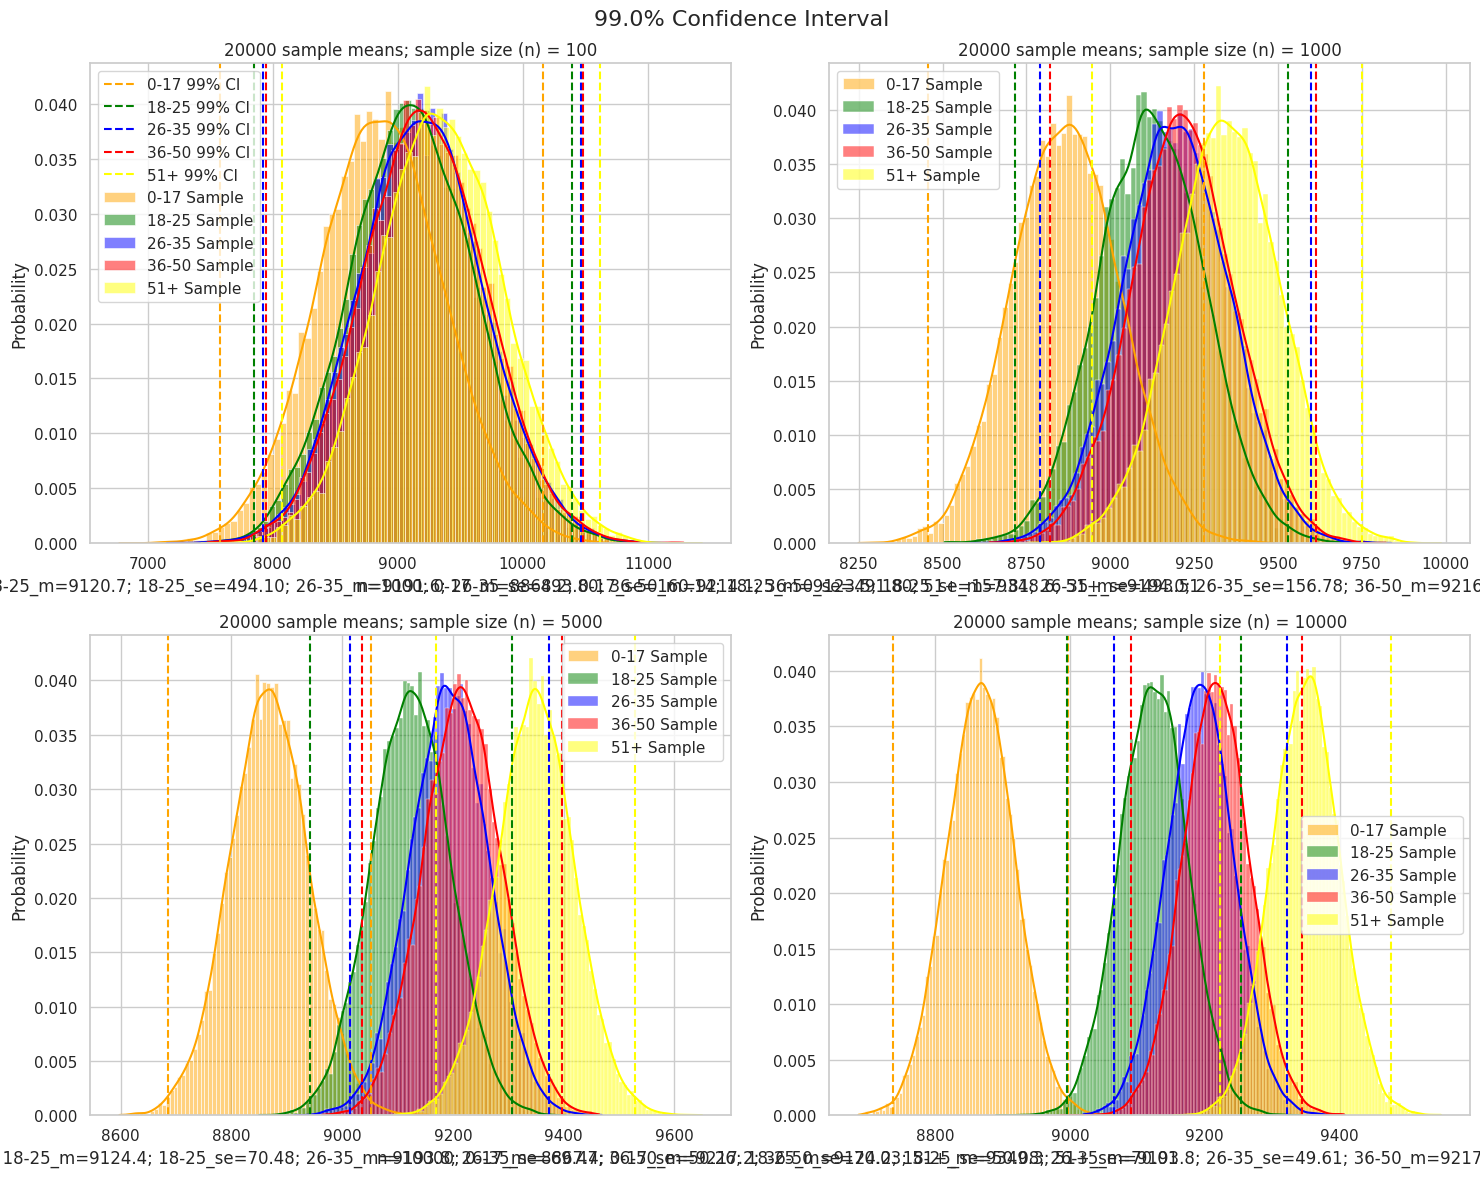

In [ ]:
confidence_interval = 0.99
ci_99 = plot_sample_means(arr_df, confidence_interval, label_arr, color)

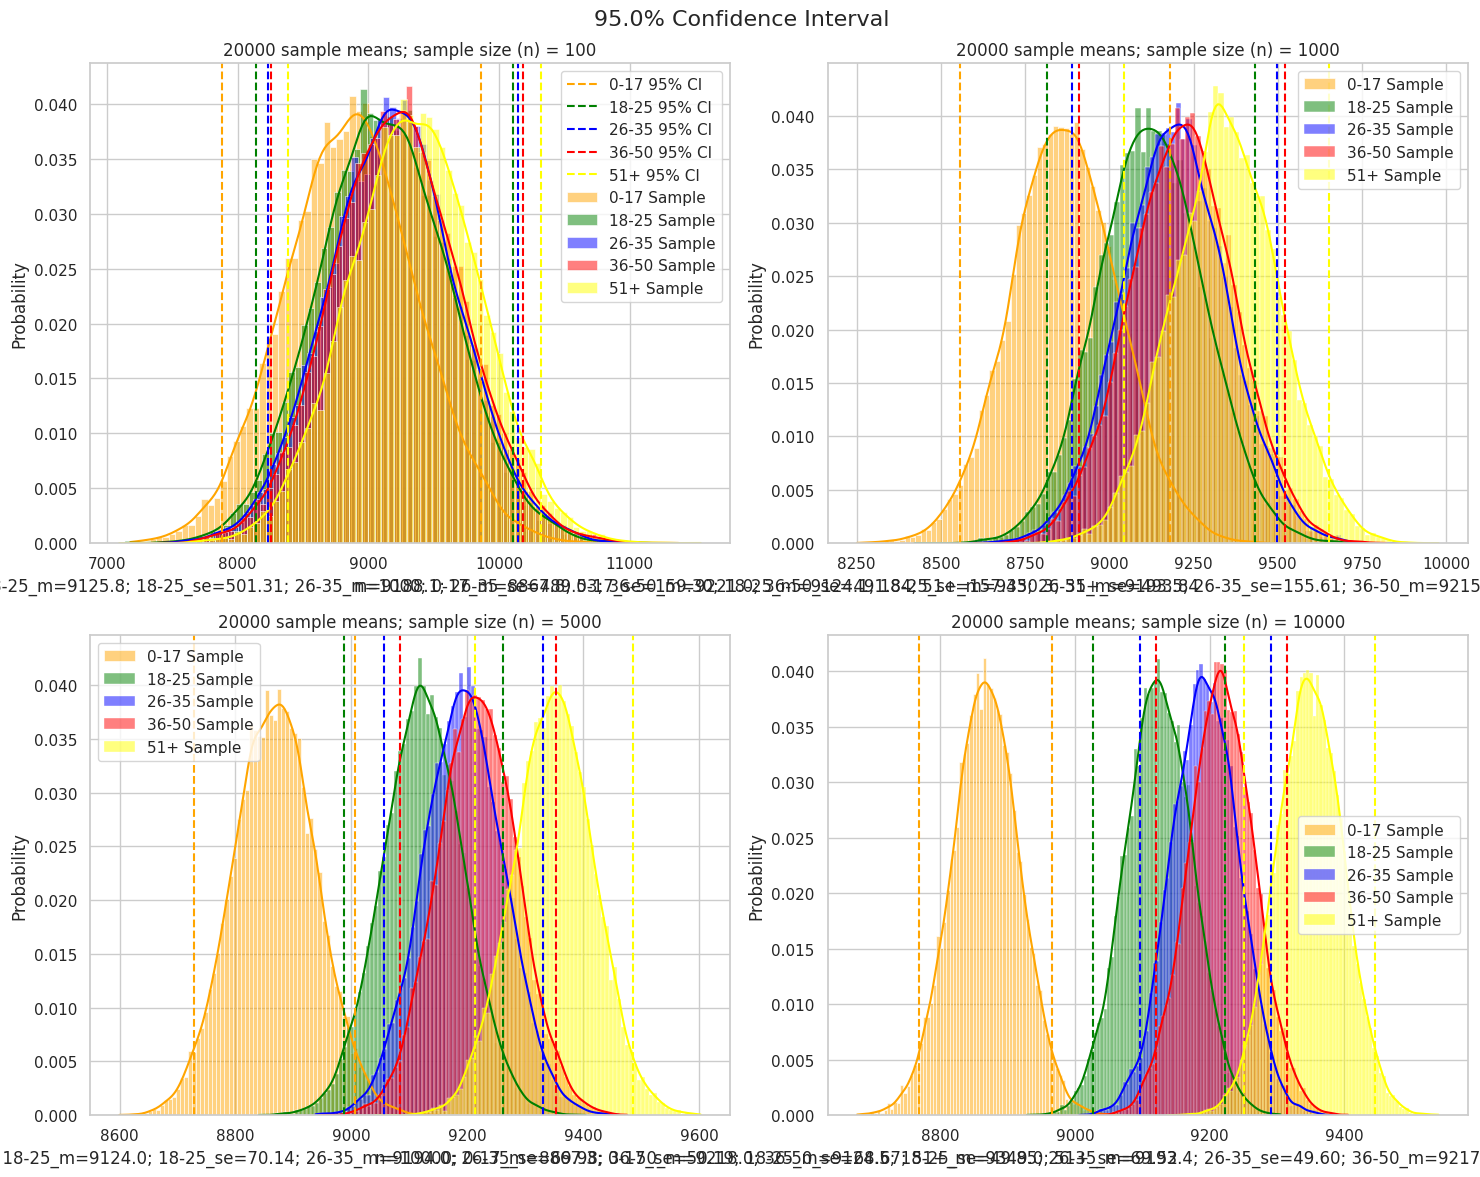

In [ ]:
confidence_interval = 0.95
ci_95 = plot_sample_means(arr_df, confidence_interval, label_arr, color)

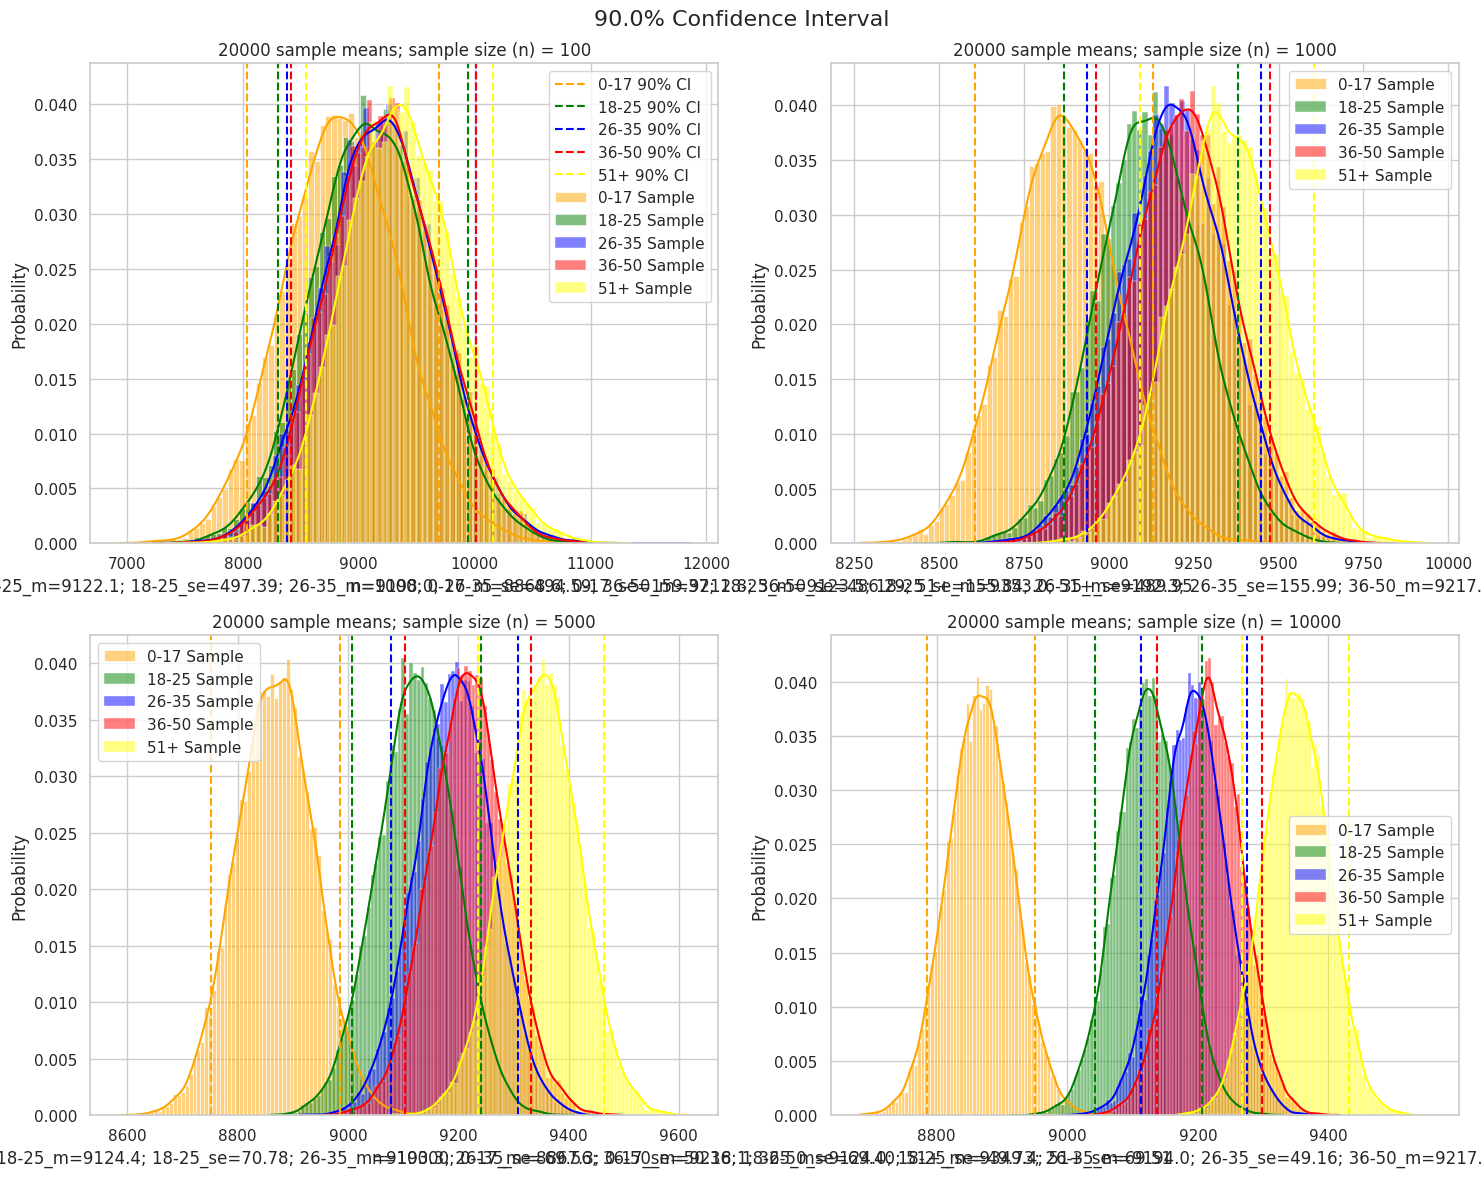

In [ ]:
confidence_interval = 0.90
ci_90 = plot_sample_means(arr_df, confidence_interval, label_arr, color)

In [ ]:
# Concatenate the DataFrames
ci_combined = pd.concat([ci_99, ci_95, ci_90], axis=1)
ci_combined.reset_index(drop=True, inplace=True)
ci_combined

Confidence Interval Sample  Sample Size  Lower Limit   Upper Limit  \
0                    99   0-17          100  7577.359675  10165.274332   
1                    99  18-25          100  7848.042715  10393.453812   
2                    99  26-35          100  7919.646748  10463.535941   
3                    99  36-50          100  7947.337742  10480.906244   
4                    99    51+          100  8077.402387  10619.810092   
5                    99   0-17         1000  8455.669127   9280.633197   
6                    99  18-25         1000  8717.040812   9530.014034   
7                    99  26-35         1000  8790.197790   9597.878174   
8                    99  36-50         1000  8819.000140   9613.965354   
9                    99    51+         1000  8945.596481   9751.188157   
10                   99   0-17         5000  8685.047063   9051.331592   
11                   99  18-25         5000  8942.835761   9305.942431   
12                   99  26-35         5000  9014.834281   9372.738988   
13                   99  36-50         5000  9036.813325   9397.604922   
14                   99    51+         5000  9169.014685   9529.681381   
15                   99   0-17        10000  8737.920933   8996.840413   
16                   99  18-25        10000  8995.187804   9253.160582   
17                   99  26-35        10000  9065.974566   9321.528395   
18                   99  36-50        10000  9090.633666   9344.116100   
19                   99    51+        10000  9223.160966   9476.073987   

    Confidence Interval Sample  Sample Size  Lower Limit   Upper Limit  \
0                    95   0-17          100  7879.726010   9863.896818   
1                    95  18-25          100  8143.206216  10108.324087   
2                    95  26-35          100  8228.603778  10147.522517   
3                    95  36-50          100  8257.015639  10185.012439   
4                    95    51+          100  8382.431879  10318.266525   
5                    95   0-17         1000  8555.554043   9179.993268   
6                    95  18-25         1000  8815.546870   9432.674292   
7                    95  26-35         1000  8888.512689   9498.509236   
8                    95  36-50         1000  8910.741406   9520.879454   
9                    95    51+         1000  9042.243749   9652.687372   
10                   95   0-17         5000  8728.006885   9007.062352   
11                   95  18-25         5000  8986.560890   9261.486109   
12                   95  26-35         5000  9056.844875   9331.152502   
13                   95  36-50         5000  9083.380470   9352.552262   
14                   95    51+         5000  9212.760857   9485.285796   
15                   95   0-17        10000  8768.962540   8965.685416   
16                   95  18-25        10000  9026.828599   9222.244671   
17                   95  26-35        10000  9096.149880   9290.575974   
18                   95  36-50        10000  9120.633274   9314.348319   
19                   95    51+        10000  9251.751425   9445.262267   

    Confidence Interval Sample  Sample Size  Lower Limit   Upper Limit  
0                    90   0-17          100  8038.634835   9690.830612  
1                    90  18-25          100  8303.943893   9940.198809  
2                    90  26-35          100  8384.432752  10011.498652  
3                    90  36-50          100  8412.960112  10012.722307  
4                    90    51+          100  8547.065448  10158.853431  
5                    90   0-17         1000  8606.480413   9130.759565  
6                    90  18-25         1000  8867.133523   9379.807618  
7                    90  26-35         1000  8935.755312   9448.925378  
8                    90  36-50         1000  8960.738209   9473.660339  
9                    90    51+         1000  9092.701760   9603.230215  
10                   90   0-17         5000  8751.659507   8984.751018  
11                

Insights:
- Using CLT we can infer the fact that the confidence interval for the purchase amount is narrowed down and was so precise when the sample size is increased. This will help the business to make better decisions.
- From the above analysis, we can infer that the certain groups are overlapping which indicates that they have similar buying characteristics. They includes '0-17', '51+' and all the remaining three had a close overlap.
- So, we can have a separate stategy to increase sales for the age group 18-50
- Likewise, some offers and discounts can be provided to retain the 51+ years customers (who is having high average transaction amount) and 0-18 (contributes more to the total purchase amount).

### How can Walmart leverage this conclusion to make changes or improvements?

- Walmart can use this information to tailor their marketing strategies to target different age group customers more effectively. For example, they could offer more promotions or discounts on products that are popular for 0-18 aged people.
- Walmart could also use this information to improve their product offerings. For example, they could introduce more products that are popular with 55+ years people to increase the sale.

## Recommendations

1. Target Male Shoppers
- Since male shoppers contribute significantly to Black Friday sales and tend to spend more per transaction, Walmart should customize its marketing strategies and product offerings to encourage higher spending among men while maintaining competitive pricing on products geared towards women.

2. Prioritize the 26-45 Age Group
- As the 26-45 age group accounts for the largest share of sales, Walmart should focus on catering to the needs and preferences of this demographic. Offering exclusive deals on products popular among these shoppers can help maximize sales within this group.

3. Engage Younger Shoppers
- Given that customers aged 0-17 have the lowest spending per transaction, Walmart can encourage higher spending from younger shoppers by providing more attractive discounts, coupons, or rewards. Building brand loyalty with younger consumers is key for long-term success.

4. Customer Segmentation for Tailored Offers
- Since shoppers in the 18-25, 26-35, and 46-50 age groups exhibit similar purchasing behaviors, while the 36-45 and 55+ groups show aligned preferences, Walmart can refine its product selection and pricing strategies to better meet the needs of these distinct age groups.

5. Enhance the Shopping Experience for the 51-55 Age Group
- With customers aged 51-55 showing the highest spending per transaction, Walmart can offer them exclusive pre-sale access, special discounts, and personalized product recommendations. Introducing loyalty programs tailored to this age group can help boost retention and reward high-value customers.

6. Post-Black Friday Customer Engagement
- After Black Friday, Walmart should engage with customers by sending follow-up emails or offers for related products. This strategy will enhance customer retention and encourage repeat purchases throughout the holiday season and beyond.